# <b><div style='padding:25px;background-color:#9B2335;color:white;border-radius:4px;font-size:100%;text-align: center'>Singapore  Resale Flat Prices Prediction<br></div>

# Importing required libraries

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import pearsonr,kstest, norm, boxcox
import scipy.stats as stats
from pyonemap import OneMap
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import math
sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)  
import pickle

# Reading the Dataset

In [61]:
df_90_99=pd.read_csv(r'dataset\ResaleFlatPricesBasedonApprovalDate19901999.csv')
df_00_12=pd.read_csv(r'dataset\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
df_12_14=pd.read_csv(r'dataset\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')
df_15_16=pd.read_csv(r'dataset\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')
df_17_=pd.read_csv(r'dataset\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

In [62]:
df=pd.concat([df_90_99,df_00_12,df_12_14,df_15_16,df_17_], axis=0)

In [63]:
# df['month'] = pd.to_datetime(df['month'],format='%Y-%m' , errors='raise')
df.sample(10)

month         town flat_type block         street_name storey_range  \
179275  2024-05      HOUGANG    4 ROOM  476C  UPP SERANGOON VIEW     10 TO 12   
34933   2018-09        BEDOK    3 ROOM   201      BEDOK NTH ST 1     04 TO 06   
211215  2006-07       BISHAN    3 ROOM   129        BISHAN ST 12     01 TO 03   
172543  2024-02      HOUGANG    4 ROOM  476C  UPP SERANGOON VIEW     07 TO 09   
22910   2018-03        BEDOK    4 ROOM   111  BEDOK RESERVOIR RD     01 TO 03   
9096    2012-07       BISHAN    4 ROOM   178        BISHAN ST 13     07 TO 09   
981     2017-01     TAMPINES    5 ROOM   135          SIMEI ST 1     01 TO 03   
182934  1998-02  JURONG WEST    3 ROOM   208         BOON LAY PL     19 TO 21   
41760   2014-05  JURONG WEST    3 ROOM   122       YUAN CHING RD     07 TO 09   
257012  1999-06   ANG MO KIO    3 ROOM   536   ANG MO KIO AVE 10     07 TO 09   

        floor_area_sqm         flat_model  lease_commence_date  resale_price  \
179275            92.0  Premium Apartment                 2016      720888.0   
34933             73.0     New Generation                 1979      358000.0   
211215            64.0         Simplified                 1987      186000.0   
172543            92.0  Premium Apartment                 2016      660000.0   
22910             96.0     New Generation                 1985      375000.0   
9096              83.0         Simplified                 1987      520000.0   
981              122.0           Improved                 1988      550000.0   
182934            65.0           IMPROVED                 1976      115000.0   
41760             61.0           Improved                 1974      278000.0   
257012            68.0     NEW GENERATION                 1980      144000.0   

           remaining_lease  
179275  90 years 11 months  
34933   59 years 11 months  
211215                 NaN  
172543  91 years 02 months  
22910   66 years 05 months  
9096                   NaN  
981     70 years 06 months  
182934                 NaN  
41760                  NaN  
257012                 NaN

# Understanding the Dataset

In [64]:
print(df.shape)
df.head(4)

(927465, 11)


month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   

   floor_area_sqm flat_model  lease_commence_date  resale_price  \
0            31.0   IMPROVED                 1977        9000.0   
1            31.0   IMPROVED                 1977        6000.0   
2            31.0   IMPROVED                 1977        8000.0   
3            31.0   IMPROVED                 1977        6000.0   

  remaining_lease  
0             NaN  
1             NaN  
2             NaN  
3             NaN

In [65]:
print(df.dtypes,'\n\n')
df.info()


month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object 


<class 'pandas.core.frame.DataFrame'>
Index: 927465 entries, 0 to 181261
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                927465 non-null  object 
 1   town                 927465 non-null  object 
 2   flat_type            927465 non-null  object 
 3   block                927465 non-null  object 
 4   street_name          927465 non-null  object 
 5   storey_range         927465 non-null  object 
 6   floor_area_sqm       927465 non-null  float64
 7   flat_model           927465 non-null  object 
 8   lease_commence_date  

# Checking Null Values

In [66]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [67]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

# Updating Data types

In [68]:
df['town'] = df['town'].astype('category')
df['flat_type'] = df['flat_type'].astype('category') 
df['block'] = df['block'].astype('category')
df['street_name'] = df['street_name'].astype('category') 
df['storey_range'] = df['storey_range'].astype('category')
df['flat_model'] = df['flat_model'].astype('category')
df['remaining_lease'] = df['remaining_lease'].astype('category')

In [69]:
for i in df.select_dtypes(include='number'):
    print(f'{i}- Min {df[i].min()}---, Max {df[i].max()} ')

floor_area_sqm- Min 28.0---, Max 307.0 
lease_commence_date- Min 1966---, Max 2020 
resale_price- Min 5000.0---, Max 1588000.0 


In [70]:
df['floor_area_sqm'] = df['floor_area_sqm'].astype('float32')
df['lease_commence_date'] = df['lease_commence_date'].astype('int32')
df['month'] = pd.to_datetime(df['month'], format='%Y-%m', errors='coerce')


In [71]:
for i in df.select_dtypes(exclude='number'):
    print(f'{i}- {df[i].value_counts().count()}\n ')

month- 414
 
town- 27
 
flat_type- 8
 
block- 2711
 
street_name- 584
 
storey_range- 25
 
flat_model- 34
 
remaining_lease- 726
 


In [72]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 927465 entries, 0 to 181261
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                927465 non-null  datetime64[ns]
 1   town                 927465 non-null  category      
 2   flat_type            927465 non-null  category      
 3   block                927465 non-null  category      
 4   street_name          927465 non-null  category      
 5   storey_range         927465 non-null  category      
 6   floor_area_sqm       927465 non-null  float32       
 7   flat_model           927465 non-null  category      
 8   lease_commence_date  927465 non-null  int32         
 9   resale_price         927465 non-null  float64       
 10  remaining_lease      218415 non-null  category      
dtypes: category(7), datetime64[ns](1), float32(1), float64(1), int32(1)
memory usage: 37.3 MB


In [73]:
df.describe().T

count                           mean  \
month                  927465  2006-08-20 18:43:29.075706368   
floor_area_sqm       927465.0                      95.691246   
lease_commence_date  927465.0                    1988.278012   
resale_price         927465.0                  320848.058806   

                                     min                  25%  \
month                1990-01-01 00:00:00  1999-01-01 00:00:00   
floor_area_sqm                      28.0                 73.0   
lease_commence_date               1966.0               1981.0   
resale_price                      5000.0             193000.0   

                                     50%                  75%  \
month                2005-04-01 00:00:00  2014-03-01 00:00:00   
floor_area_sqm                      93.0                113.0   
lease_commence_date               1986.0               1996.0   
resale_price                    297500.0             418000.0   

                                     max            std  
month                2024-06-01 00:00:00            NaN  
floor_area_sqm                     307.0      25.824986  
lease_commence_date               2020.0      10.664813  
resale_price                   1588000.0  170522.857301

### Checking Categorical feature classification

In [74]:
for i in df.select_dtypes(exclude='number'):
    print('-----'*10,'\n',df[i].value_counts().reset_index().sort_values(by=i,ascending=True),'\n','-----'*10)

-------------------------------------------------- 
          month  count
331 1990-01-01   1507
401 1990-02-01    931
379 1990-03-01   1150
395 1990-04-01   1047
410 1990-05-01    778
..         ...    ...
228 2024-02-01   2125
237 2024-03-01   2049
161 2024-04-01   2377
123 2024-05-01   2511
411 2024-06-01    427

[414 rows x 2 columns] 
 --------------------------------------------------
-------------------------------------------------- 
                town  count
5        ANG MO KIO  52090
3             BEDOK  66677
20           BISHAN  21271
7       BUKIT BATOK  44429
9       BUKIT MERAH  34383
16    BUKIT PANJANG  27708
25      BUKIT TIMAH   2519
24     CENTRAL AREA   7150
8     CHOA CHU KANG  38348
15         CLEMENTI  28040
14          GEYLANG  28179
6           HOUGANG  50772
18      JURONG EAST  24796
2       JURONG WEST  66715
17  KALLANG/WHAMPOA  27199
26     LIM CHU KANG     64
23    MARINE PARADE   8041
10        PASIR RIS  33237
21          PUNGGOL  20665
13       QUEE

Flat Type and Flat Model has text inconsostency. 

### Cleaning Text inconsistency

In [75]:
df['town'] = df['town'].str.strip().str.title().astype('category')
df['town'] = df['town'].astype('category')
df['town'].value_counts().reset_index().sort_values(by='town')

town  count
5        Ang Mo Kio  52090
3             Bedok  66677
20           Bishan  21271
7       Bukit Batok  44429
9       Bukit Merah  34383
16    Bukit Panjang  27708
25      Bukit Timah   2519
24     Central Area   7150
8     Choa Chu Kang  38348
15         Clementi  28040
14          Geylang  28179
6           Hougang  50772
18      Jurong East  24796
2       Jurong West  66715
17  Kallang/Whampoa  27199
26     Lim Chu Kang     64
23    Marine Parade   8041
10        Pasir Ris  33237
21          Punggol  20665
13       Queenstown  28784
22        Sembawang  13869
11         Sengkang  32488
19        Serangoon  22835
0          Tampines  80005
12        Toa Payoh  31541
4         Woodlands  65563
1            Yishun  70097

In [76]:
df['flat_type'].cat.categories.unique()

Index(['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'],
      dtype='object')

In [77]:
df['flat_type'] = df['flat_type'].cat.rename_categories({'MULTI-GENERATION':'Multi Generation'})
df['flat_type'] = df['flat_type'].str.strip().str.title().astype('category')
df['flat_type'] = df['flat_type'].astype('category')
df['flat_type'].value_counts().reset_index().sort_values(by='flat_type')

flat_type   count
5            1 Room    1304
4            2 Room   11841
1            3 Room  296064
0            4 Room  352489
2            5 Room  195520
3         Executive   69704
6  Multi Generation     543

In [78]:
df['street_name'] = df['street_name'].str.strip().str.title().astype('category')
df['street_name'] = df['street_name'].astype('category')
df['street_name'].value_counts().reset_index().sort_values(by='street_name')

street_name  count
141    Admiralty Dr   2370
225  Admiralty Link   1498
521      Ah Hood Rd    185
565    Alexandra Rd     59
583  Aljunied Ave 2      1
..              ...    ...
384   Yung Kuang Rd    530
468     Yung Loh Rd    299
387    Yung Ping Rd    515
429   Yung Sheng Rd    408
447         Zion Rd    354

[584 rows x 2 columns]

In [79]:
df['flat_model'] = df['flat_model'].str.strip().str.title().astype('category')
df['flat_model'].value_counts().reset_index().sort_values(by='flat_model')

flat_model   count
16                  2-Room     138
20                    3Gen      32
11           Adjoined Flat    1250
6                Apartment   35504
9                     Dbss    3308
1                 Improved  241907
17     Improved-Maisonette     126
7               Maisonette   29681
0                  Model A  265265
10      Model A-Maisonette    2078
8                 Model A2   10142
13        Multi Generation     543
2           New Generation  189023
4        Premium Apartment   46812
18  Premium Apartment Loft     108
19      Premium Maisonette      86
3               Simplified   57560
5                 Standard   42554
12                 Terrace     694
14                 Type S1     437
15                 Type S2     217

In [80]:
df['Avg_storey_range']= df['storey_range'].apply(lambda x: (int(x.split(' TO ')[0]) + int(x.split(' TO ')[1])) / 2) 
df['Avg_storey_range'] = df['Avg_storey_range'].astype('int8')

In [81]:
df.sample(4)

month             town  flat_type block        street_name  \
187154 1998-03-01        Pasir Ris  Executive   206    Pasir Ris St 21   
48535  1993-08-01      Bukit Merah     3 Room     2       Jln Bt Merah   
17862  2000-07-01  Kallang/Whampoa     4 Room    69        Moulmein Rd   
156238 2004-08-01      Jurong West     4 Room  668A  Jurong West St 64   

       storey_range  floor_area_sqm flat_model  lease_commence_date  \
187154     10 TO 12           146.0  Apartment                 1993   
48535      04 TO 06            73.0   Improved                 1975   
17862      13 TO 15            84.0   Improved                 1972   
156238     10 TO 12            90.0   Model A2                 2000   

        resale_price remaining_lease  Avg_storey_range  
187154      510000.0             NaN                11  
48535        85000.0             NaN                 5  
17862       285000.0             NaN                14  
156238      232000.0             NaN                11

In [82]:
df.Avg_storey_range.value_counts()

Avg_storey_range
5     232709
8     212720
2     186466
11    178899
14     62059
17     24174
20     11441
23      7535
26      3445
3       2700
29      1647
13      1259
32       631
35       577
38       516
18       265
41       246
44        65
47        53
28        39
50        17
33         2
Name: count, dtype: int64

## Features Details and Types

1. Month - Month of sale of the property
2. Town - Property Location
3. Flat Type - Property Classification
5. Block - Building contains multiple units/flats
6. Street Name - Property Location
7. Storey Range - Estimated range of floors the unit sold was located on
8. Floor Area SQM - Total Estimated space measured in square meters
9. Flat Model - Classification of units by generation of which the flat was made, ranging from New Generation, DBSS, Improved, Apartment
10. Lease Commence Date - Starting point of a lease agreement, marking the beginning of the lease term during which the tenant has the right to use and occupy the leased property
11. Resale Price - Cost of the flat sold
12. Remaining Lease

In [84]:
print(df.info())
df.sample(3)

<class 'pandas.core.frame.DataFrame'>
Index: 927465 entries, 0 to 181261
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                927465 non-null  datetime64[ns]
 1   town                 927465 non-null  category      
 2   flat_type            927465 non-null  category      
 3   block                927465 non-null  category      
 4   street_name          927465 non-null  category      
 5   storey_range         927465 non-null  category      
 6   floor_area_sqm       927465 non-null  float32       
 7   flat_model           927465 non-null  category      
 8   lease_commence_date  927465 non-null  int32         
 9   resale_price         927465 non-null  float64       
 10  remaining_lease      218415 non-null  category      
 11  Avg_storey_range     927465 non-null  int8          
dtypes: category(7), datetime64[ns](1), float32(1), float64(1), int32(1), int8(1)


month       town flat_type block     street_name storey_range  \
145825 2023-01-01     Yishun    4 Room  674A    Yishun Ave 4     01 TO 03   
271127 2008-09-01  Sembawang    5 Room  467A    Admiralty Dr     04 TO 06   
297022 2009-08-01  Woodlands    3 Room    17  Marsiling Lane     13 TO 15   

        floor_area_sqm         flat_model  lease_commence_date  resale_price  \
145825            93.0            Model A                 2018      520000.0   
271127           115.0  Premium Apartment                 2001      330000.0   
297022            65.0           Improved                 1984      214000.0   

           remaining_lease  Avg_storey_range  
145825  94 years 10 months                 2  
271127                 NaN                 5  
297022                 NaN                14

In [85]:
print(df.isnull().sum(),'\n\n',df.isna().sum())

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
Avg_storey_range            0
dtype: int64 

 month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
Avg_storey_range            0
dtype: int64


In [86]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'Avg_storey_range'],
      dtype='object')

In [87]:
num=df.select_dtypes(include=['number']).columns
for col in num:
    print(f"{col} -  {(df[col] <= 0).sum()}")

floor_area_sqm -  0
lease_commence_date -  0
resale_price -  0
Avg_storey_range -  0


In [88]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'Avg_storey_range'],
      dtype='object')

# Feature Engineering

## Deriving new features

In [89]:
if 'floor_area_sqm' in df.columns:
  # Avoid division by zero (if floor area is zero)
  df['price_per_sqm'] = np.where(df['floor_area_sqm'] > 0, df['resale_price'] / df['floor_area_sqm'], np.nan)
else:
  df['price_per_sqm'] = np.nan  # Handle missing floor area

In [90]:
df['year'] = df['month'].dt.year
df['month_number'] = df['month'].dt.month
df['full_address'] = df['block'].astype(str) + " " + df['street_name'].astype(str) + " " + df['town'].astype(str)

In [91]:
df['remaining_lease_year'] = df['lease_commence_date'] + 99 - df['month'].dt.year

In [92]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'Avg_storey_range', 'price_per_sqm', 'year',
       'month_number', 'full_address', 'remaining_lease_year'],
      dtype='object')

In [93]:
df.sample(5)

month           town  flat_type block          street_name  \
232070 1999-01-01    Jurong West     4 Room   468    Jurong West St 41   
22935  2016-04-01      Pasir Ris  Executive   531       Pasir Ris Dr 1   
28824  2013-07-01  Choa Chu Kang     4 Room   451  Choa Chu Kang Ave 4   
165422 2004-12-01       Clementi     3 Room   704        West Coast Rd   
285258 1999-12-01  Choa Chu Kang     5 Room   503  Choa Chu Kang St 51   

       storey_range  floor_area_sqm         flat_model  lease_commence_date  \
232070     07 TO 09            98.0     New Generation                 1985   
22935      04 TO 06           148.0         Maisonette                 1992   
28824      13 TO 15           104.0  Premium Apartment                 2000   
165422     01 TO 03            67.0     New Generation                 1980   
285258     13 TO 15           128.0           Improved                 1995   

        resale_price remaining_lease  Avg_storey_range  price_per_sqm  year  \
232070      223000.0             NaN                 8    2275.510204  1999   
22935       720000.0              75                 5    4864.864865  2016   
28824       430000.0             NaN                14    4134.615385  2013   
165422      215000.0             NaN                 2    3208.955224  2004   
285258      375000.0             NaN                14    2929.687500  1999   

        month_number                           full_address  \
232070             1      468 Jurong West St 41 Jurong West   
22935              4           531 Pasir Ris Dr 1 Pasir Ris   
28824              7  451 Choa Chu Kang Ave 4 Choa Chu Kang   
165422            12             704 West Coast Rd Clementi   
285258            12  503 Choa Chu Kang St 51 Choa Chu Kang   

        remaining_lease_year  
232070                    85  
22935                     75  
28824                     86  
165422                    75  
285258                    95

In [97]:
df1=df[['town', 'flat_type','floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
        'price_per_sqm', 'year','month_number', 'full_address', 'remaining_lease_year','Avg_storey_range']].copy()

In [172]:
continuous = ['floor_area_sqm', 'resale_price','price_per_sqm']
# discrete = ['lease_commence_date', 'year', 'month_number']
# nominal = ['month', 'town', 'flat_type', 'block', 'street_name', 'flat_model', 'full_address']
# ordinal = ['storey_range', 'remaining_lease']
categorical = ['year','month_number' ,'town', 'flat_type',
       'flat_model','Avg_storey_range','lease_commence_date','remaining_lease_year']

# Exploratory Data Analysis. Before Data CLeaning / Preprocessing.

In [108]:
def univar_num(df, col):
    plt.figure(figsize=(16, 8))
    df = df.dropna(subset=[col])


    mean=df[col].mean()
    median=df[col].median()
    mode=df[col].mode()[0]

    plt.subplot(2, 3, 1)
    sns.histplot(data=df, x=col, kde=True, bins=50,color='maroon',fill=True)
    plt.title(f'Histogram for {col}')
    plt.axvline(mean, color='maroon', label='Mean')
    plt.axvline(median, color='black', label='Median')
    plt.axvline(mode, color='darkgreen', label='Mode')
    
    plt.legend()
    plt.tight_layout()
    
    plt.subplot(2, 3, 2)
    sns.boxplot(data=df, x=col, color='lightgrey',legend=True)
    plt.xticks(rotation=45)
    plt.title(f'Box Plot for {col}')
    plt.axvline(mean, color='maroon', label='Mean')
    plt.axvline(median, color='black', label='Median')
    plt.axvline(mode, color='darkgreen', label='Mode')
    plt.legend()
    plt.tight_layout()

    
    plt.subplot(2, 3, 3)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.gca().get_lines()[1].set_color('maroon')
    plt.gca().get_lines()[0].set_color('darkgreen')
    plt.title(f'QQ Plot for {col}')

    plt.tight_layout()
    
    plt.tight_layout()
    plt.show()

### Numerical features Distribution

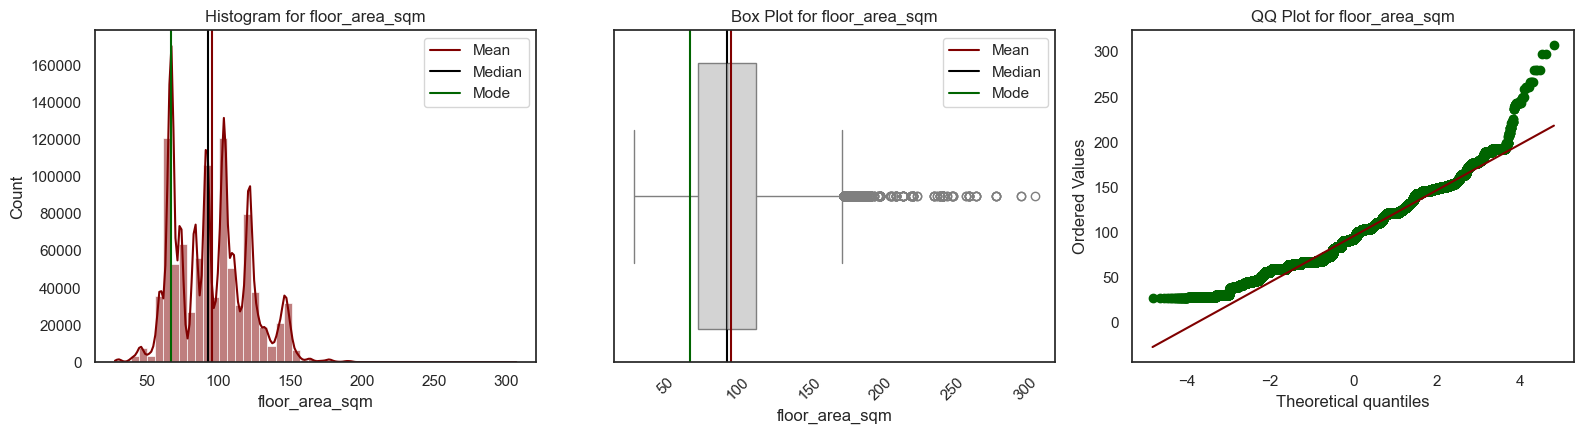

Skew for floor_area_sqm is 0.37


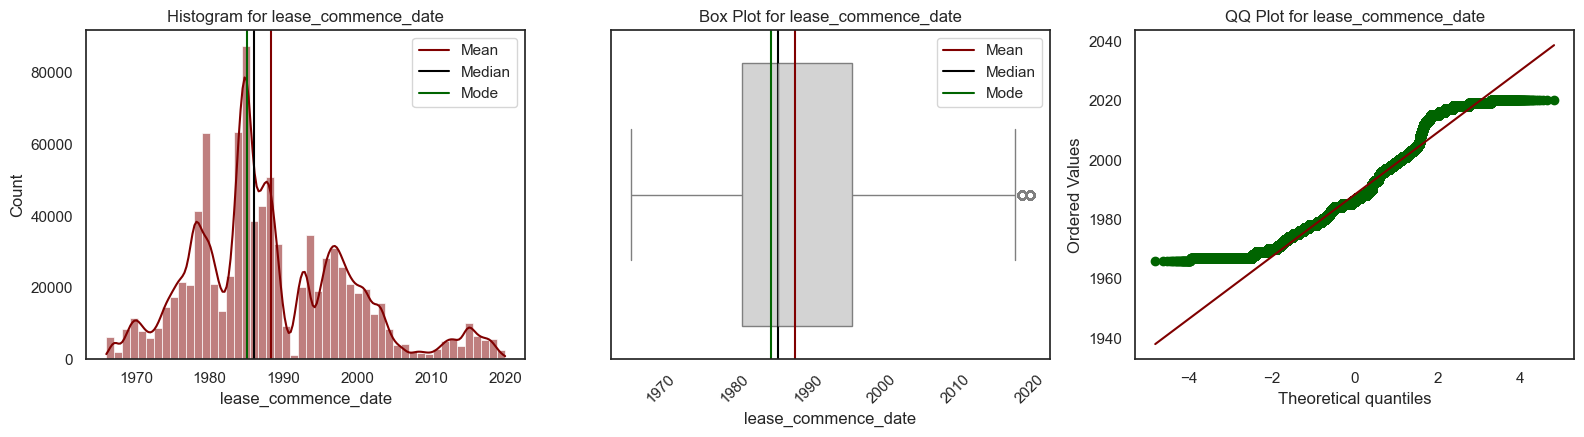

Skew for lease_commence_date is 0.65


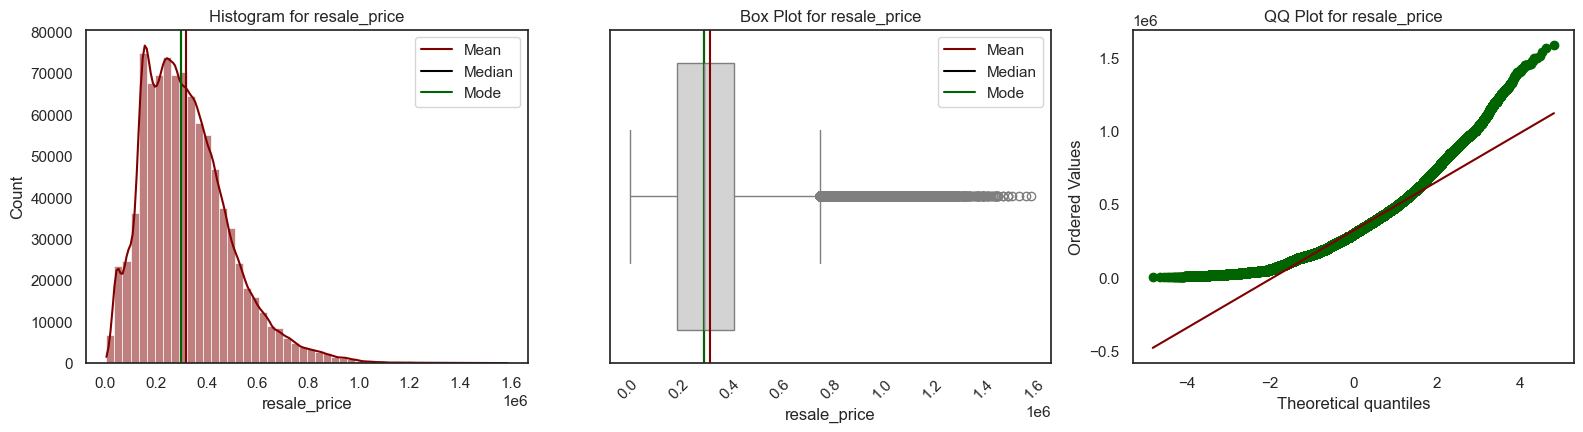

Skew for resale_price is 0.94


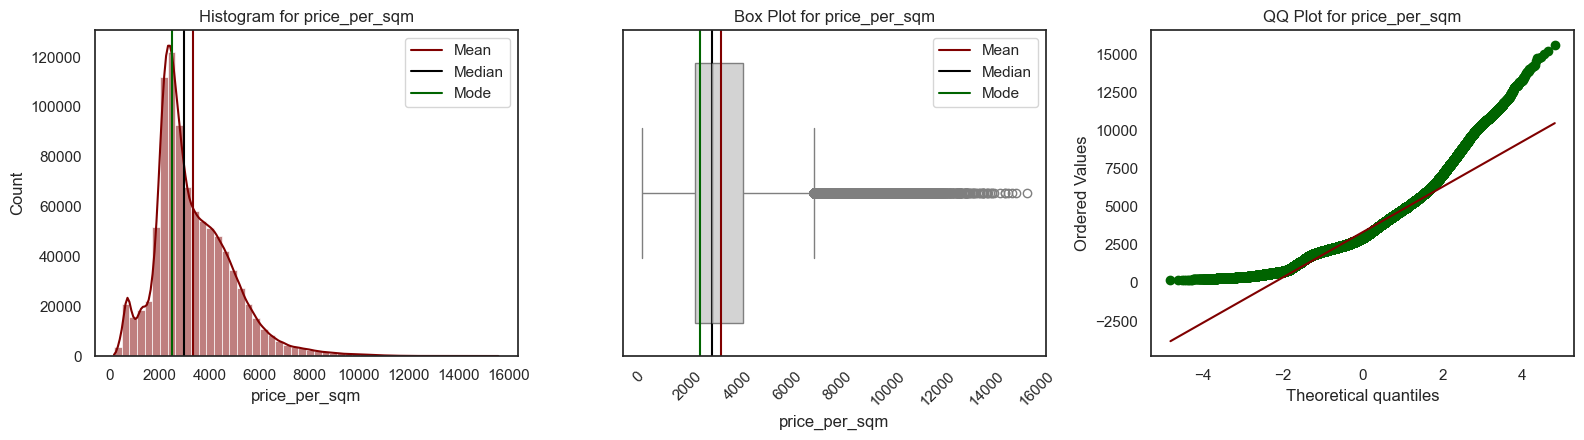

Skew for price_per_sqm is 1.07


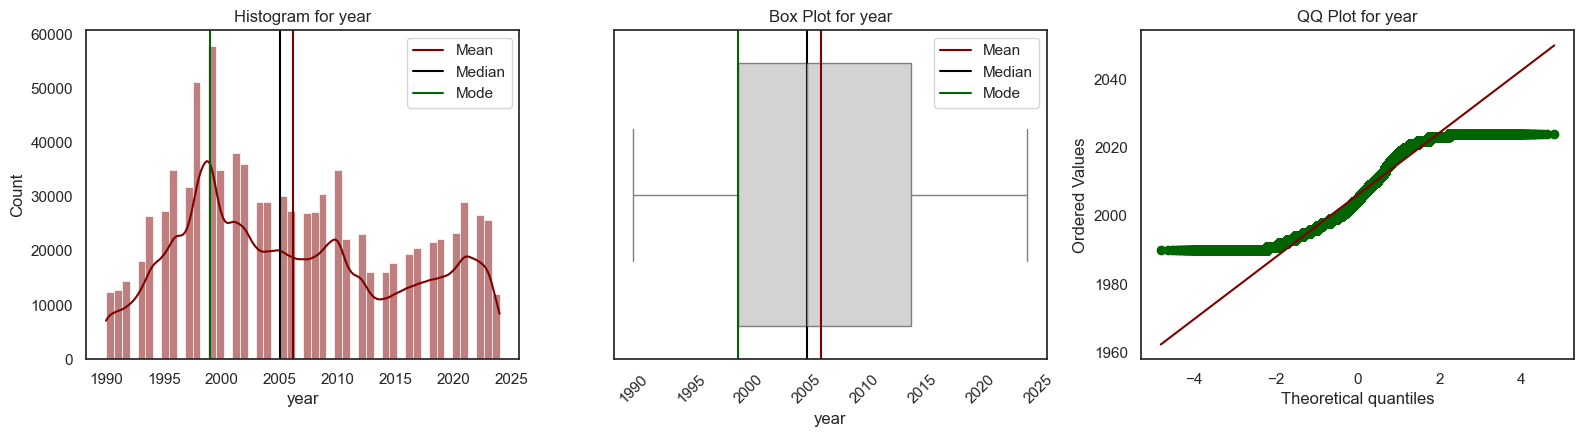

Skew for year is 0.29


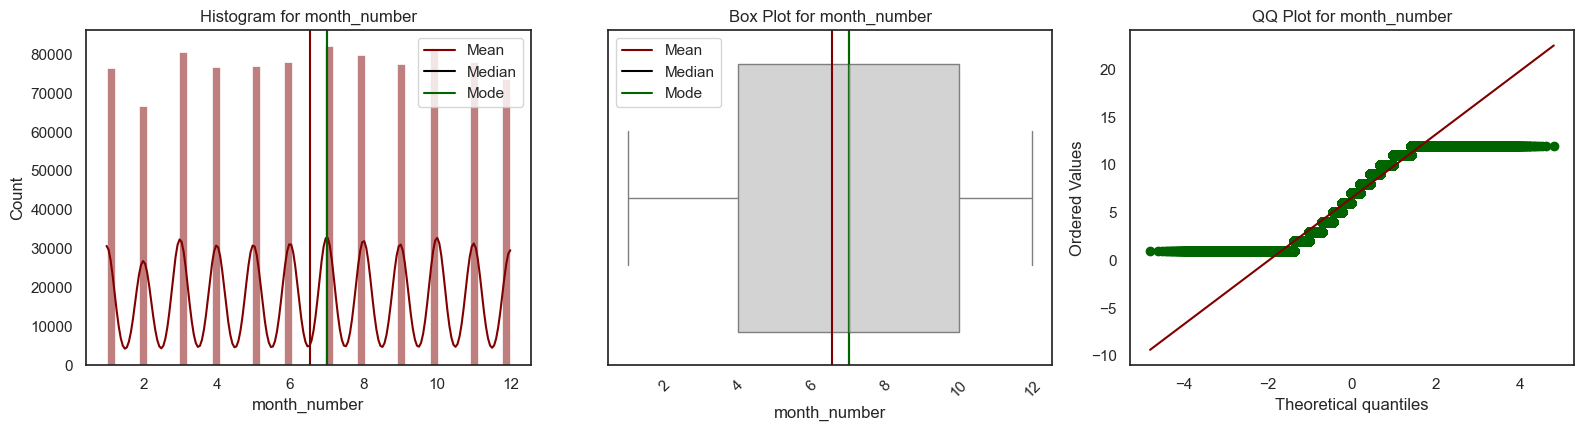

Skew for month_number is -0.03


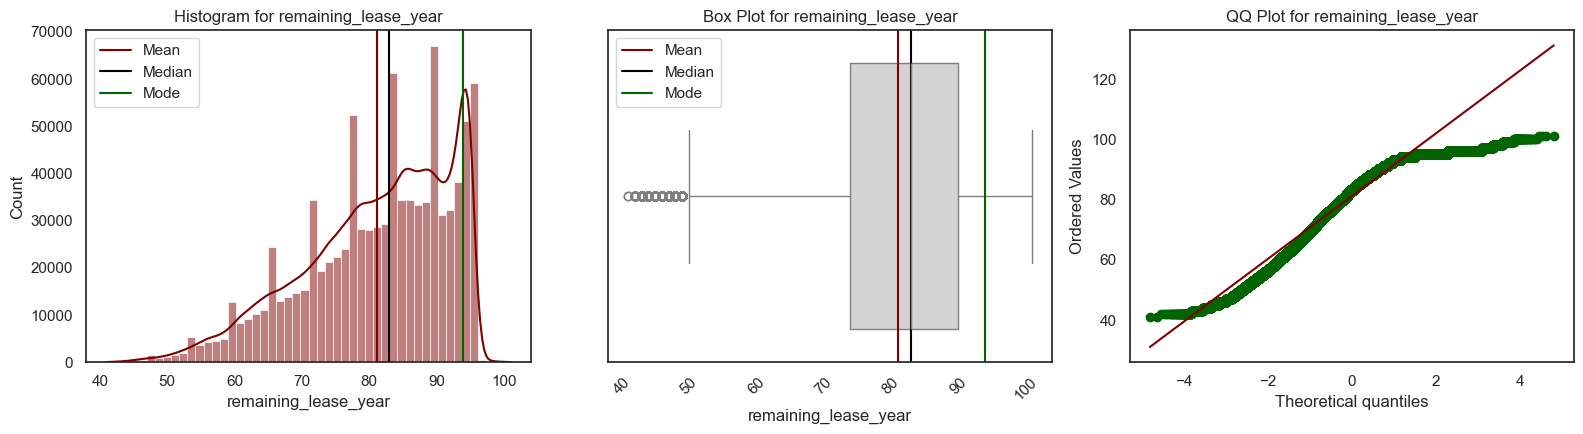

Skew for remaining_lease_year is -0.70


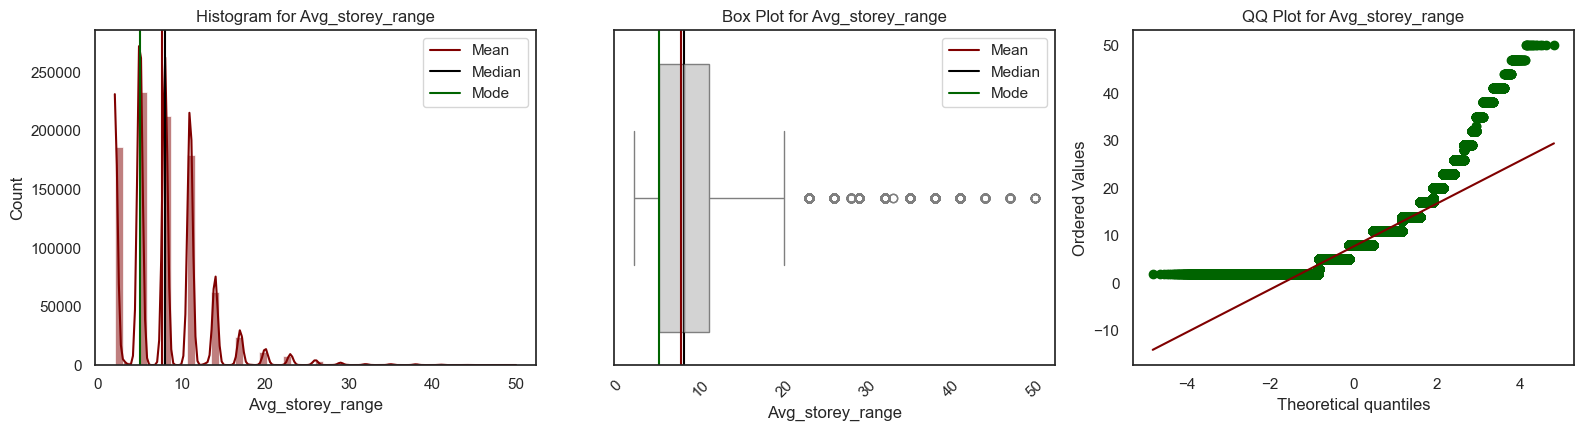

Skew for Avg_storey_range is 1.35


In [109]:
color_good = '\033[32m'  # Dark Green for good skew
color_okay = '\033[92m'  # Light Green for okay skew
color_bad = '\033[91m'  # Maroon for bad skew
color_neutral = '\033[0m'  # Reset color

skewed_col = []

sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)  

for i in df1.select_dtypes(include='number'):
    univar_num(df1,i) 
    skew_val = df1[i].skew()
    
    if -0.5 <= skew_val <= 0.5:
        color = color_good  # Dark Green for near-zero skew
    elif 0 < skew_val <= 0.5 or -0.5 < skew_val < 0:
        color = color_okay  # Light Green for slightly positive or slightly negative skew
    else:  # skew_val > 0.5 or skew_val < -0.5
        color = color_bad  # Maroon for significant skew
        skewed_col.append(i)

    print(f"\n{color}Skew for {i} is {skew_val:.2f}{color_neutral}\n")

### Categorical features Distribution

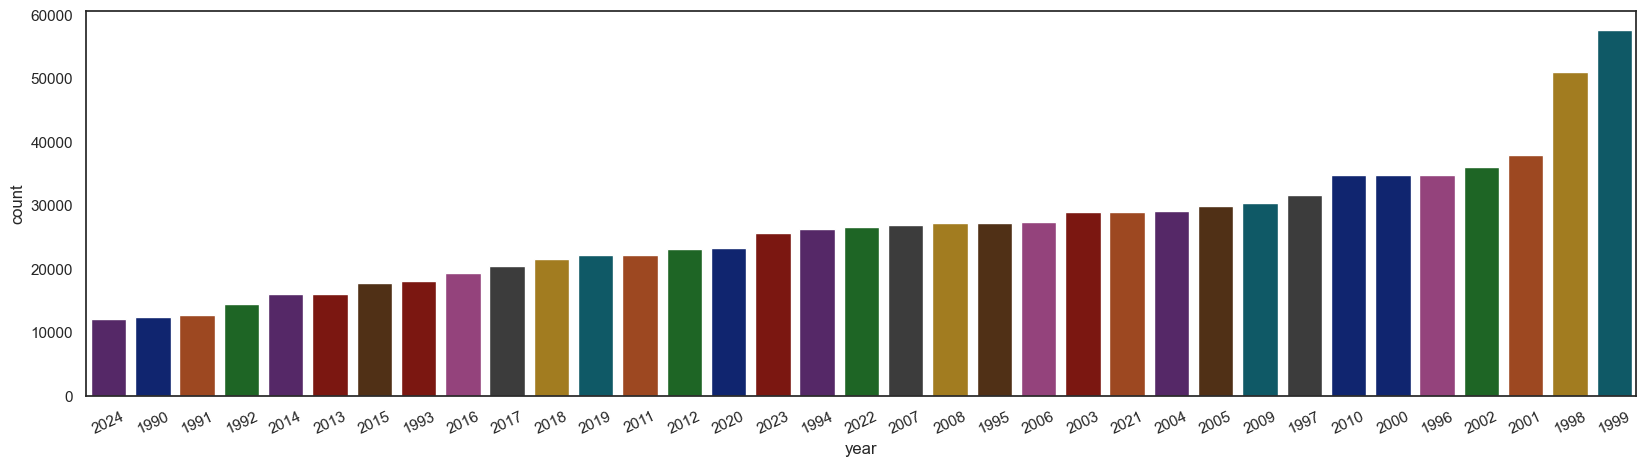

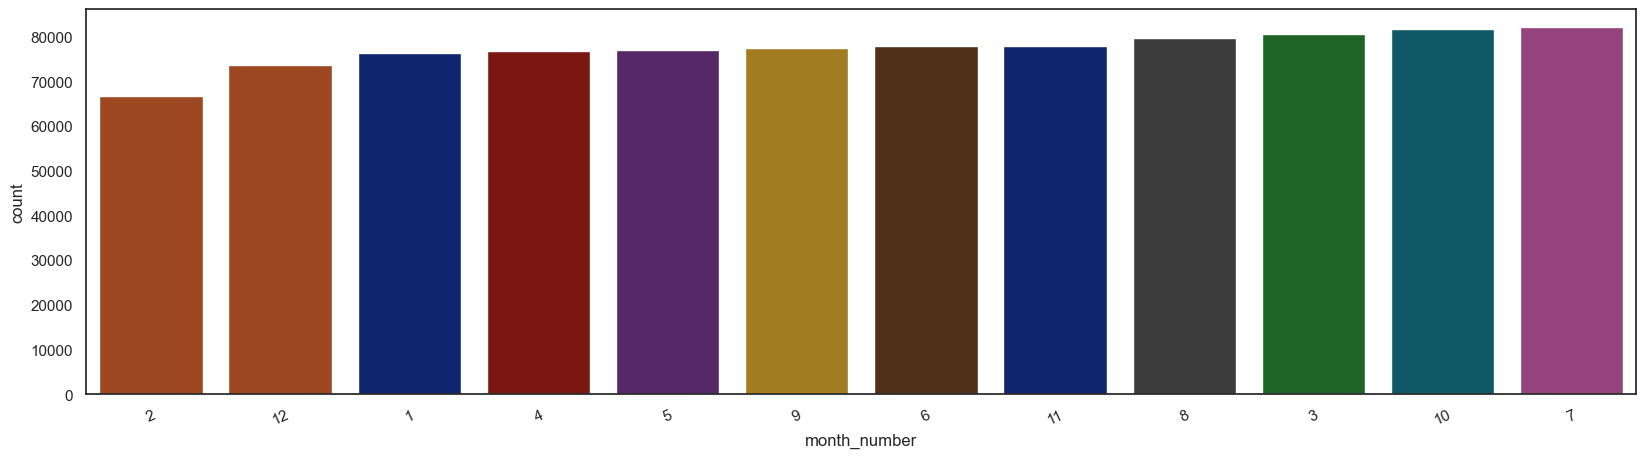

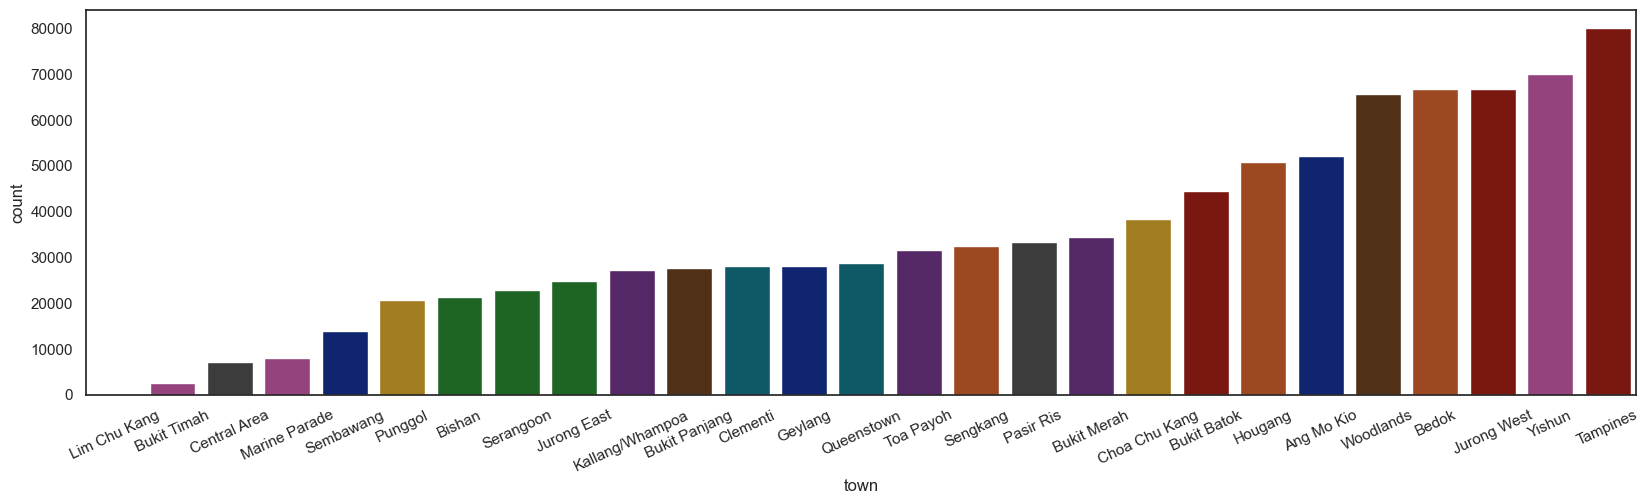

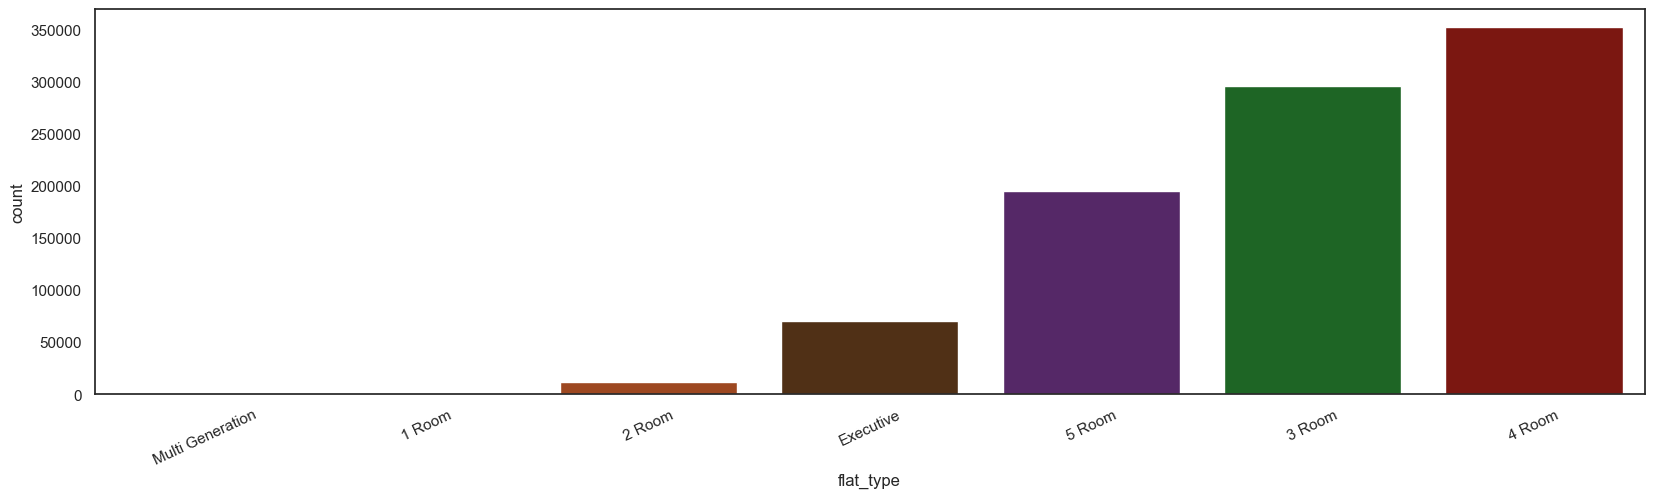

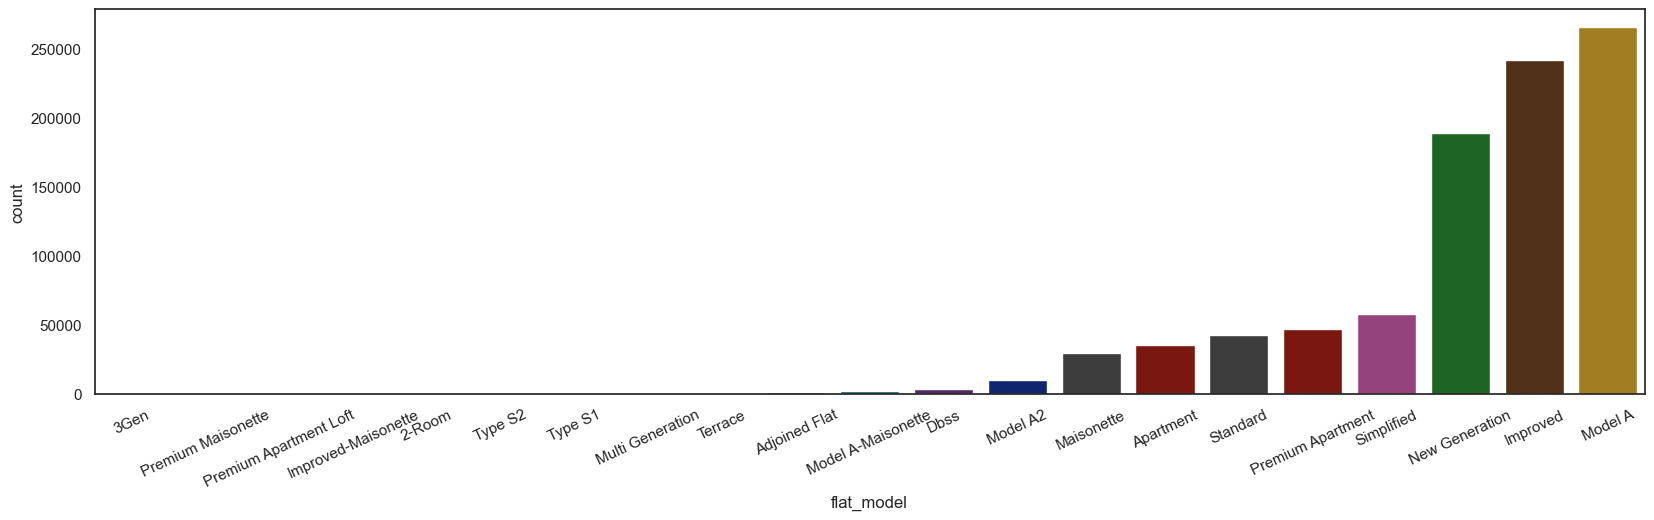

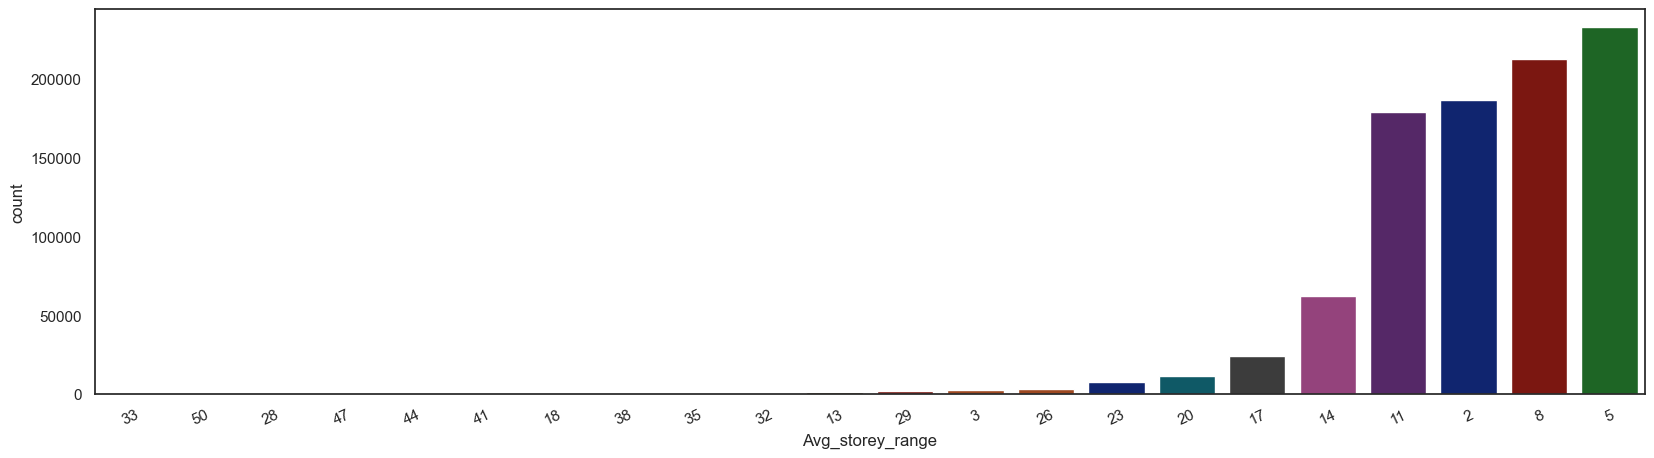

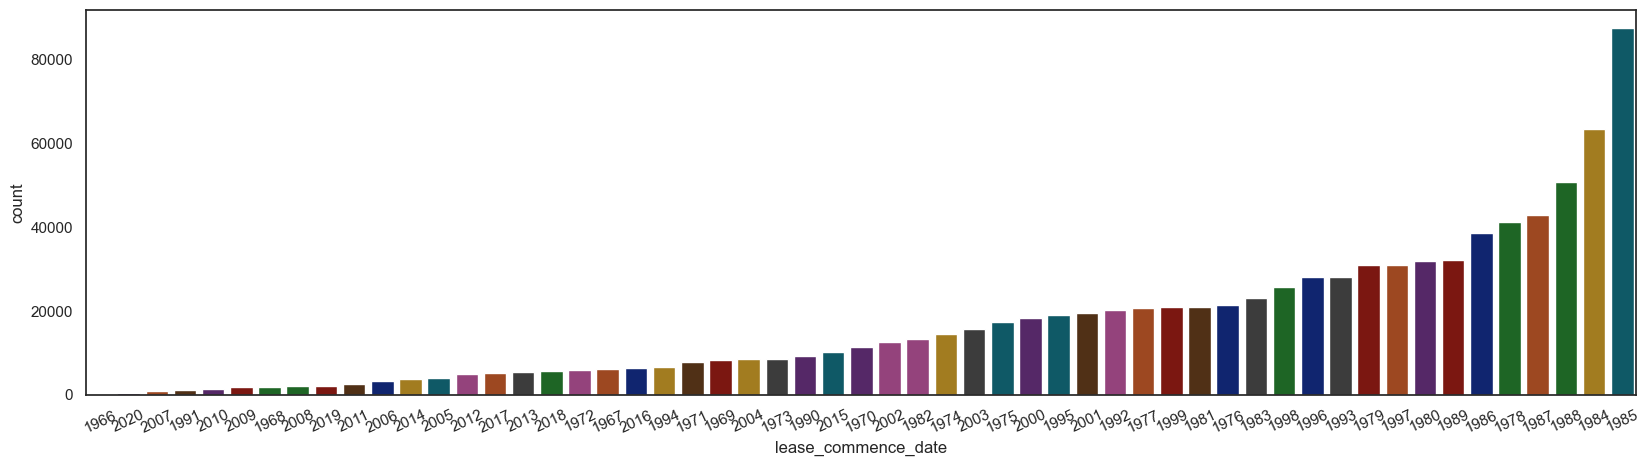

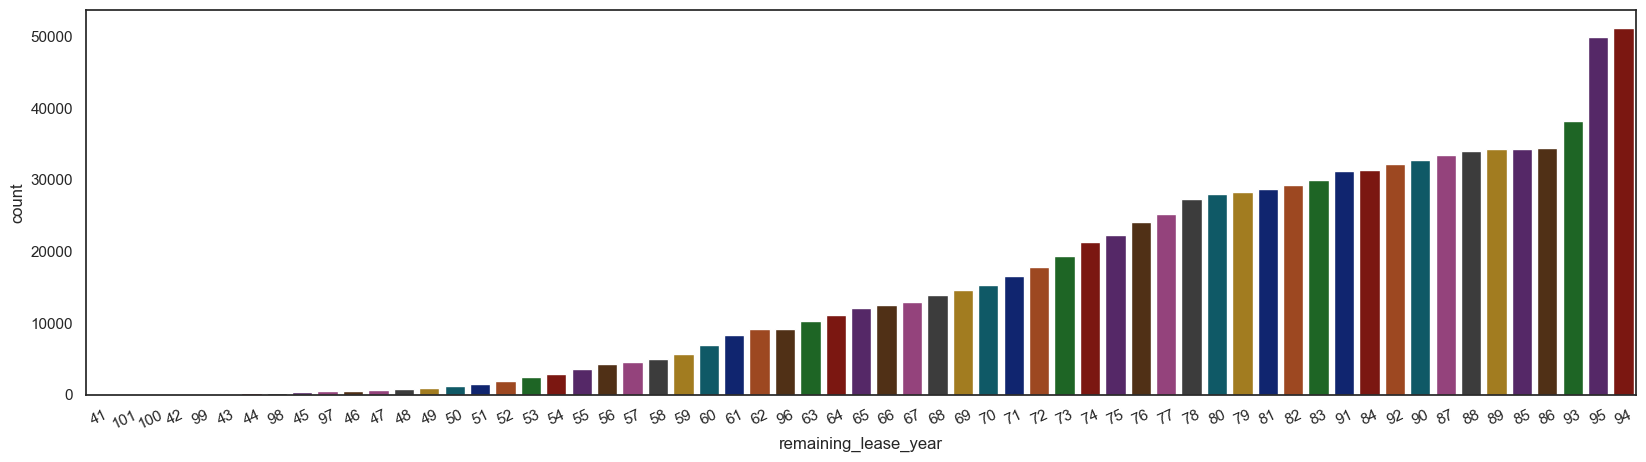

In [114]:
for i in categorical:
    plt.figure(figsize=(20, 5))
    sns.countplot(data=df1, x=df1[i], hue=i, order = df1[i].value_counts().index.tolist()[::-1],palette='dark',legend=False)
    plt.xticks(rotation=25)
    plt.show()

### Relationship Between Continuous Features and Resale Price

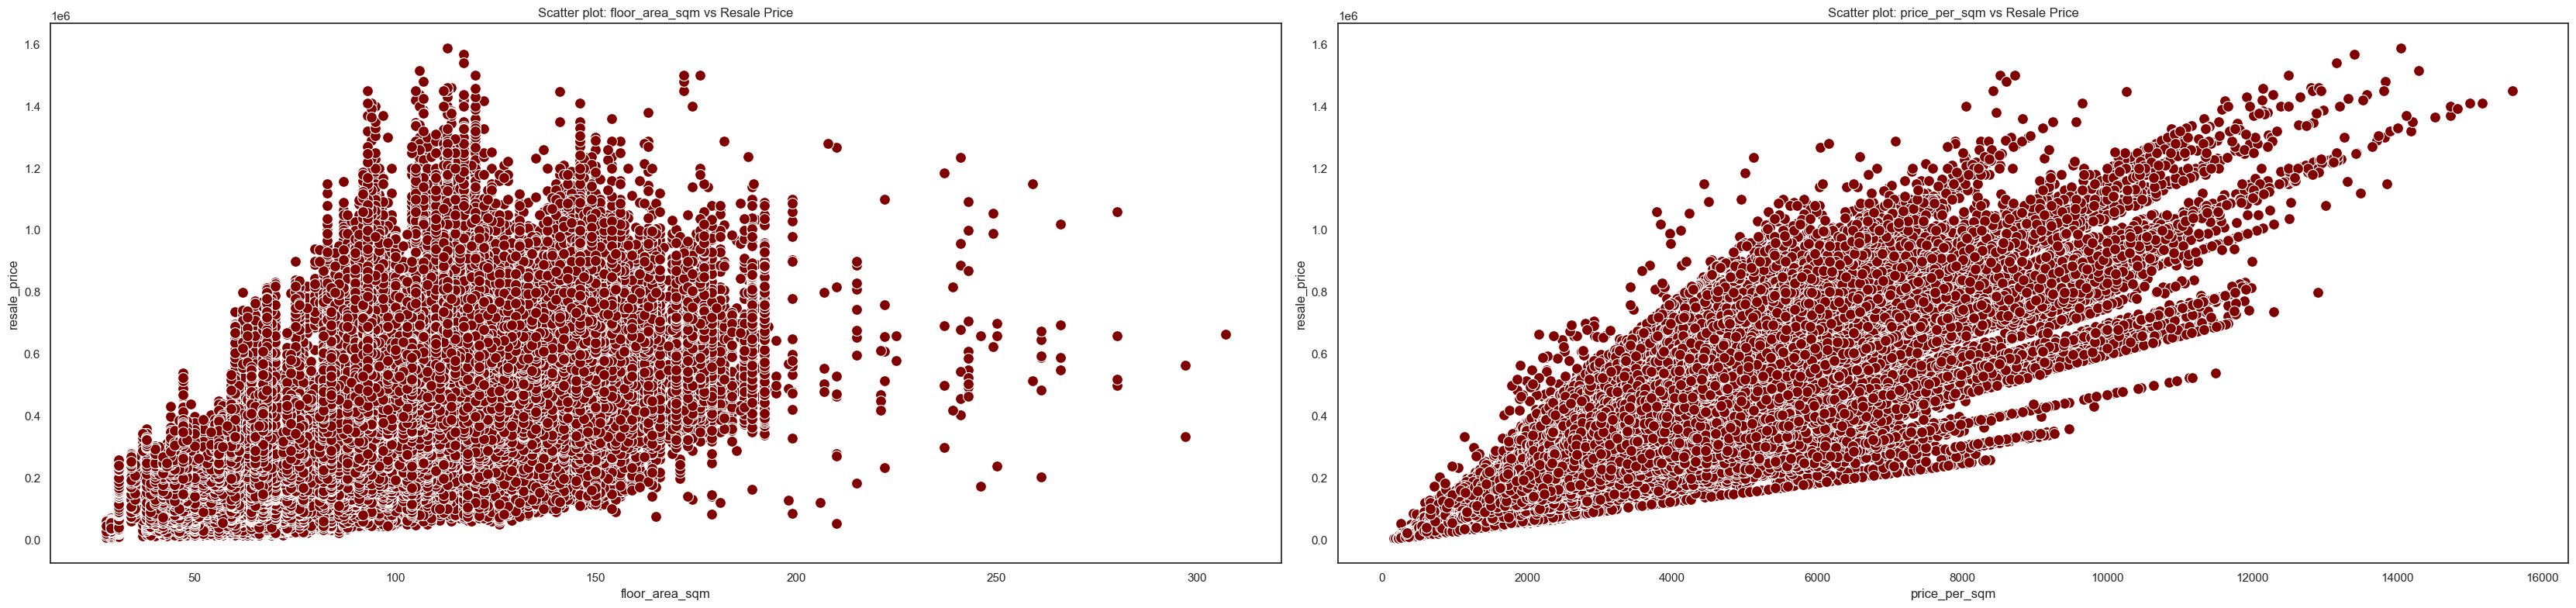

In [115]:
import math
sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1 ,color_codes=True, rc=None)  
continuous.remove('resale_price') if 'resale_price' in continuous else None
total_var=len(continuous)
plot_col=3
plot_row=math.ceil(total_var / 3)

fig, axes = plt.subplots(plot_row, plot_col, figsize=(50, 8))
axes = axes.flatten()
for i, var in  enumerate(continuous):
    sns.scatterplot(data=df1, x=var, y="resale_price", color='maroon',ax=axes[i],s=100)
    axes[i].set_title(f'Scatter plot: {var} vs Resale Price')

for i in range(i + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [146]:
continuous

['floor_area_sqm', 'price_per_sqm']

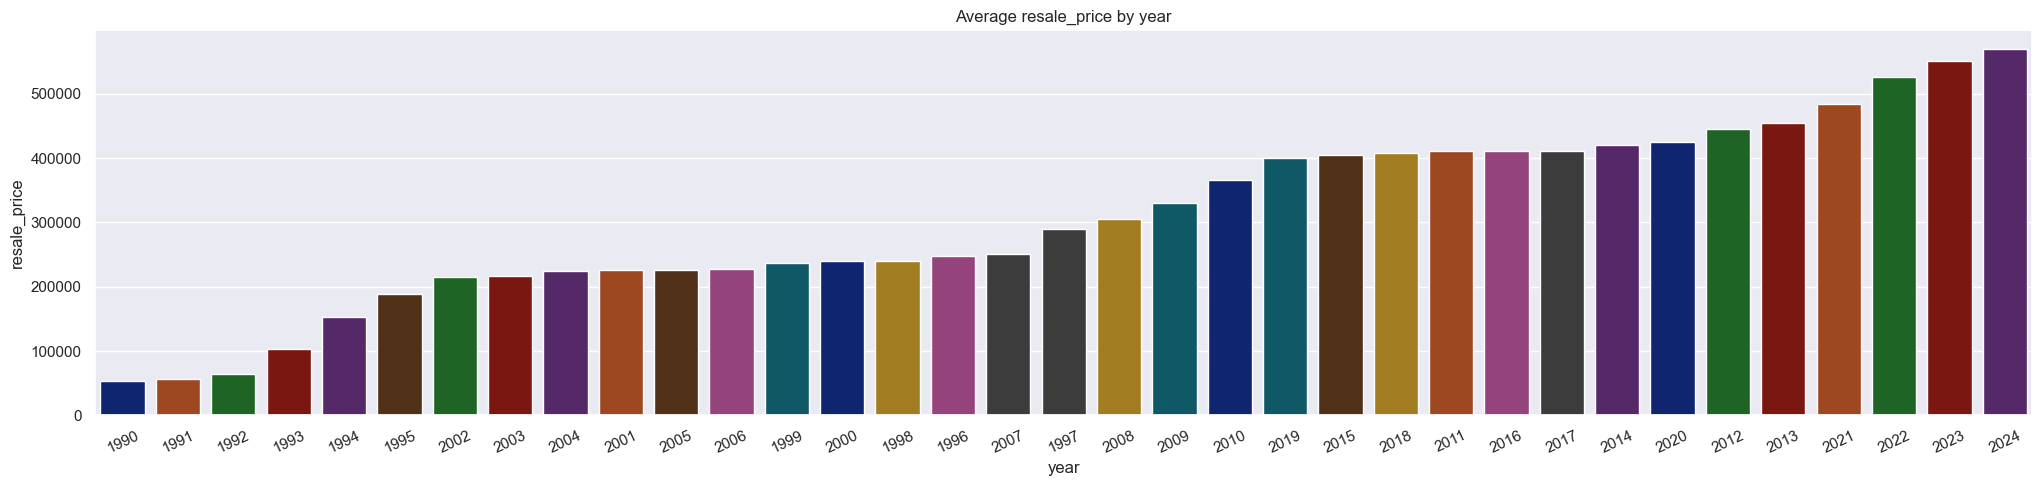

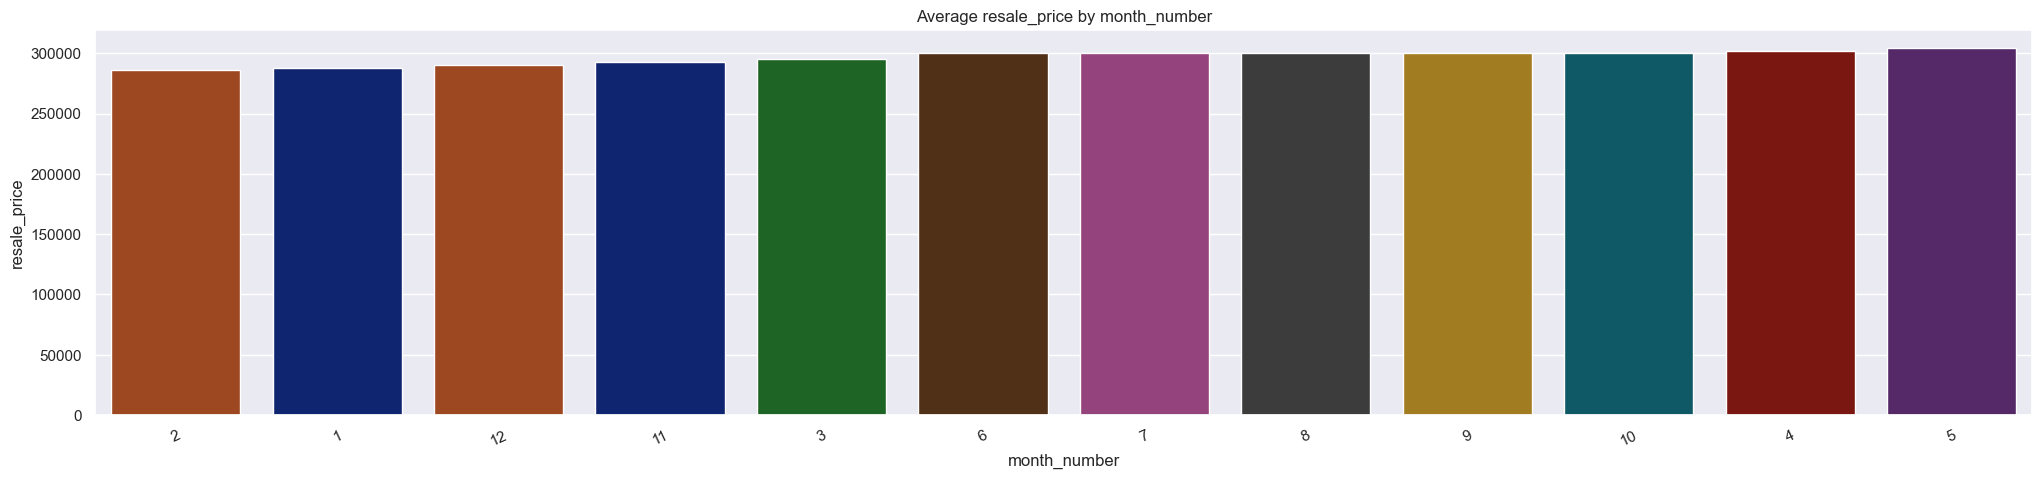

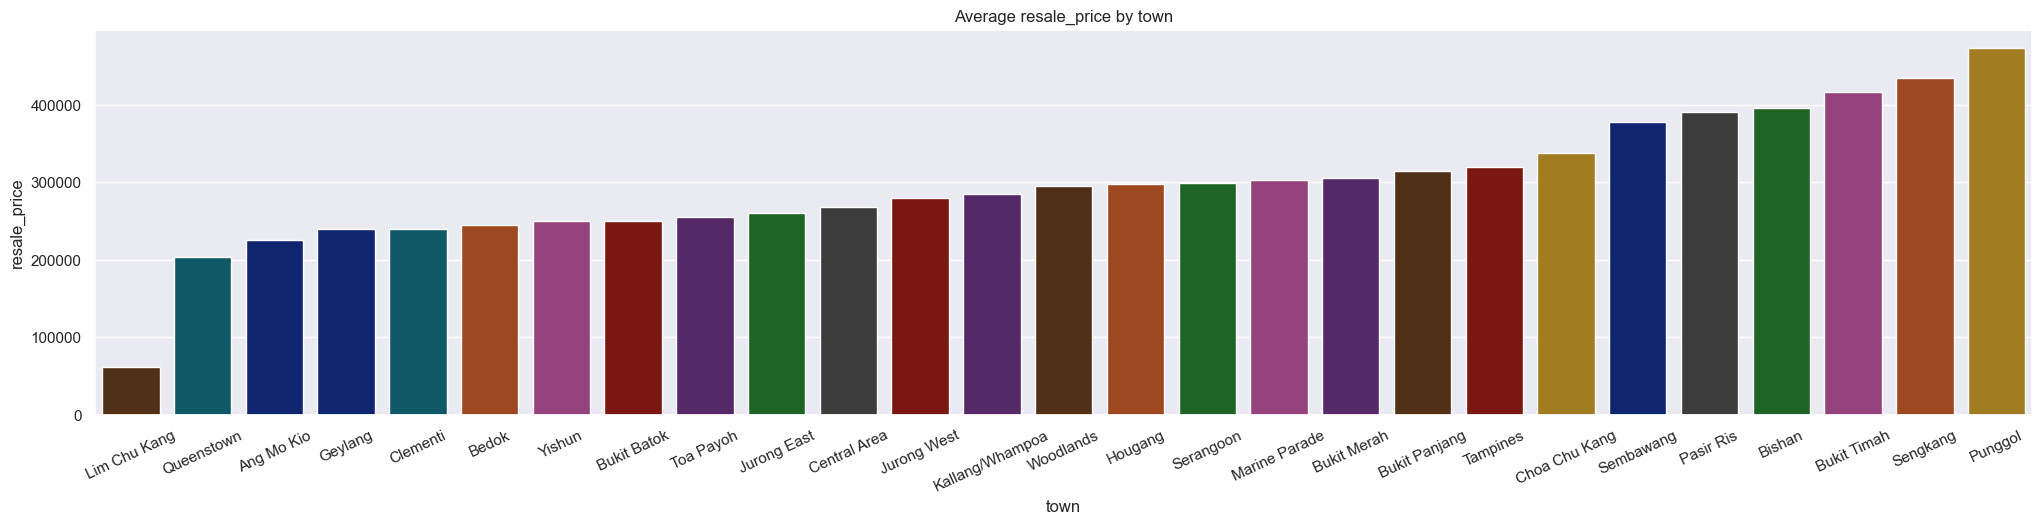

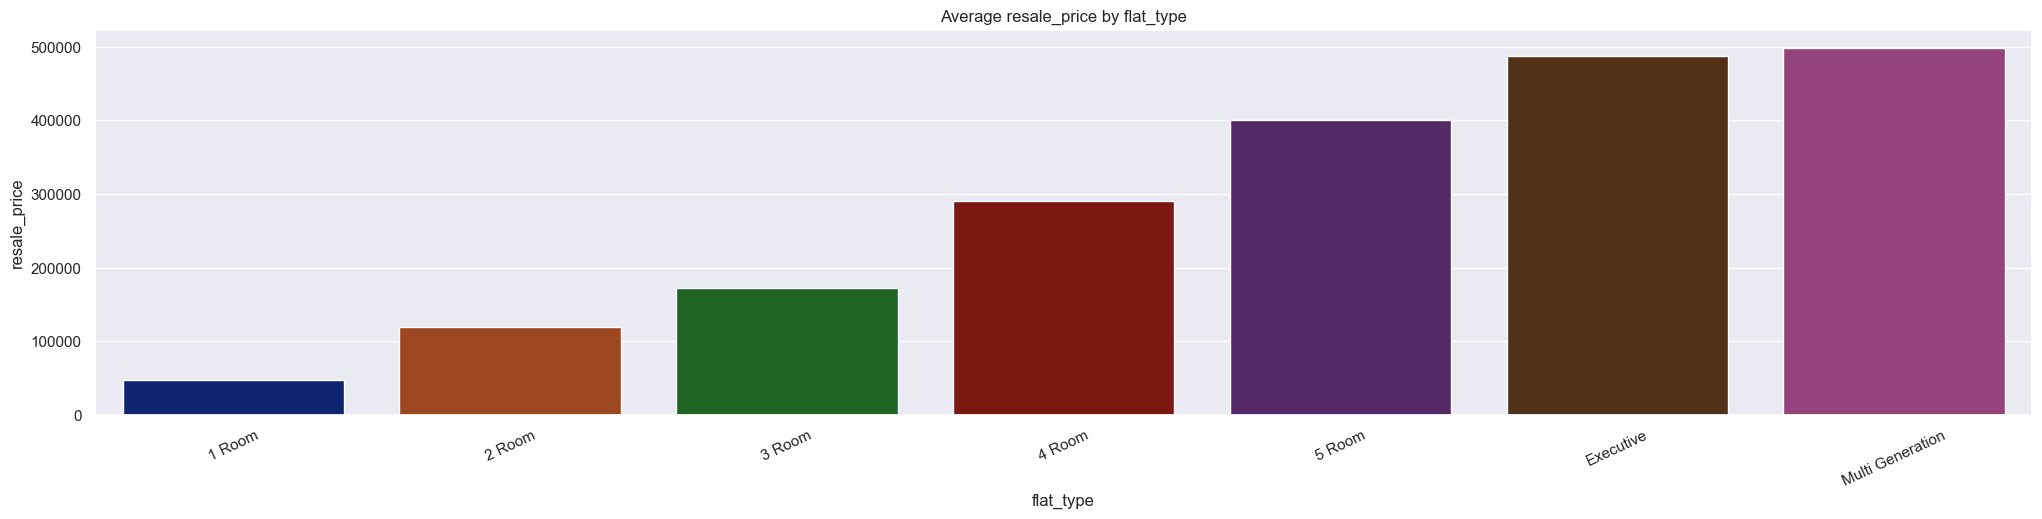

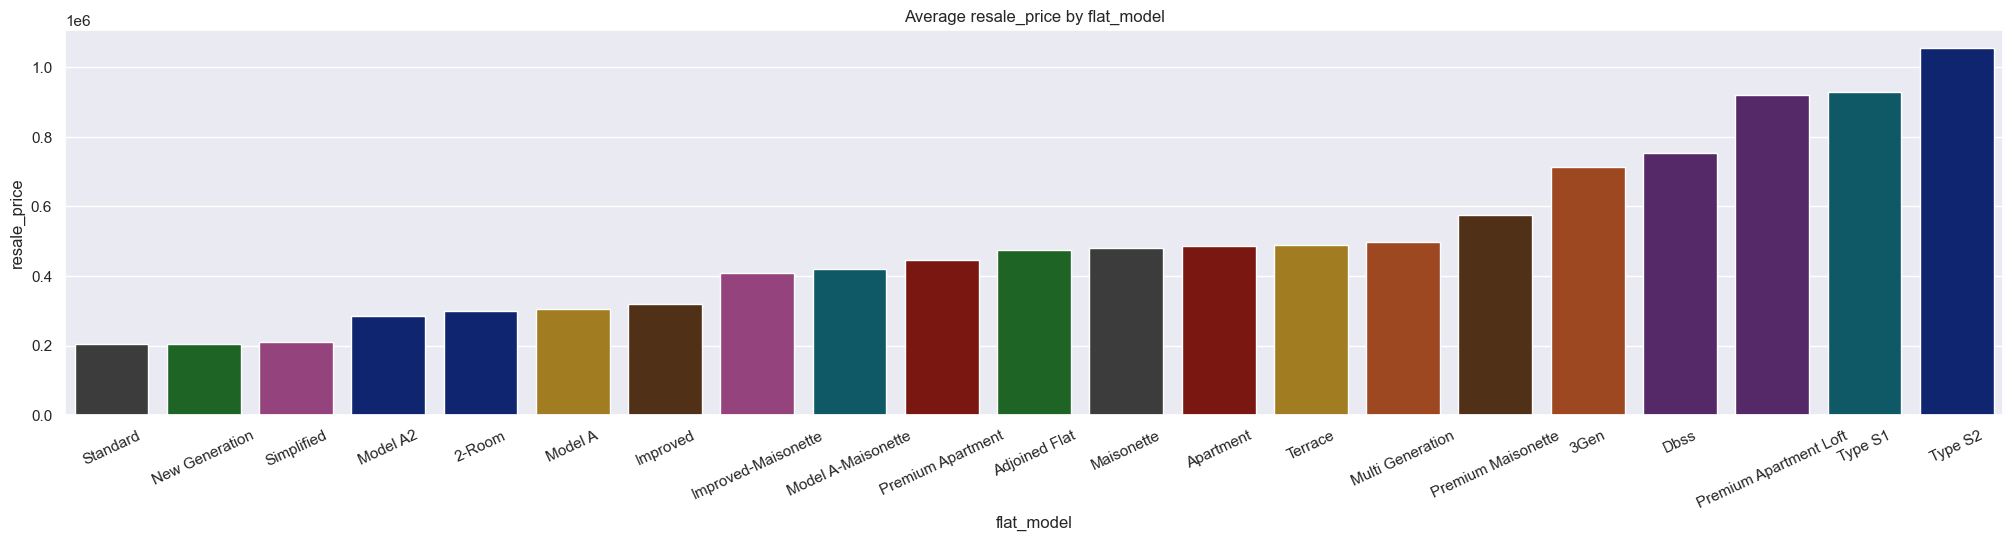

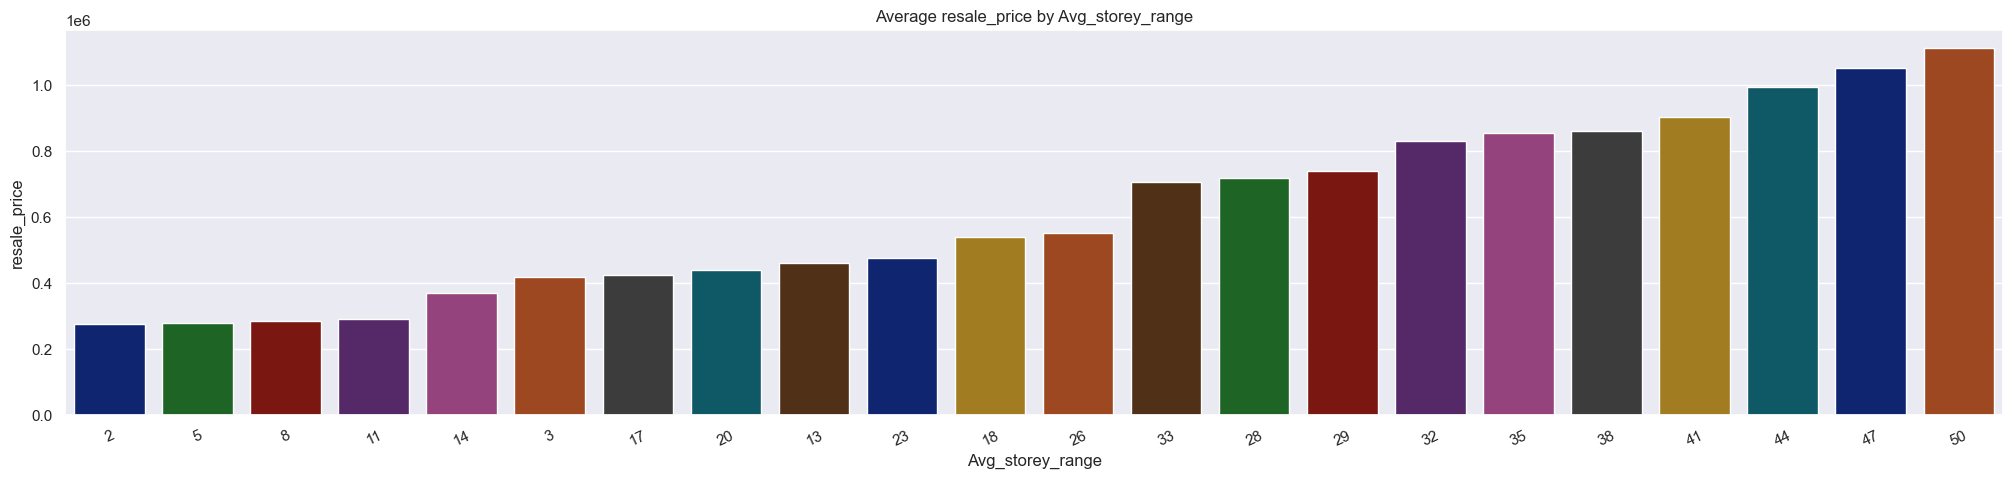

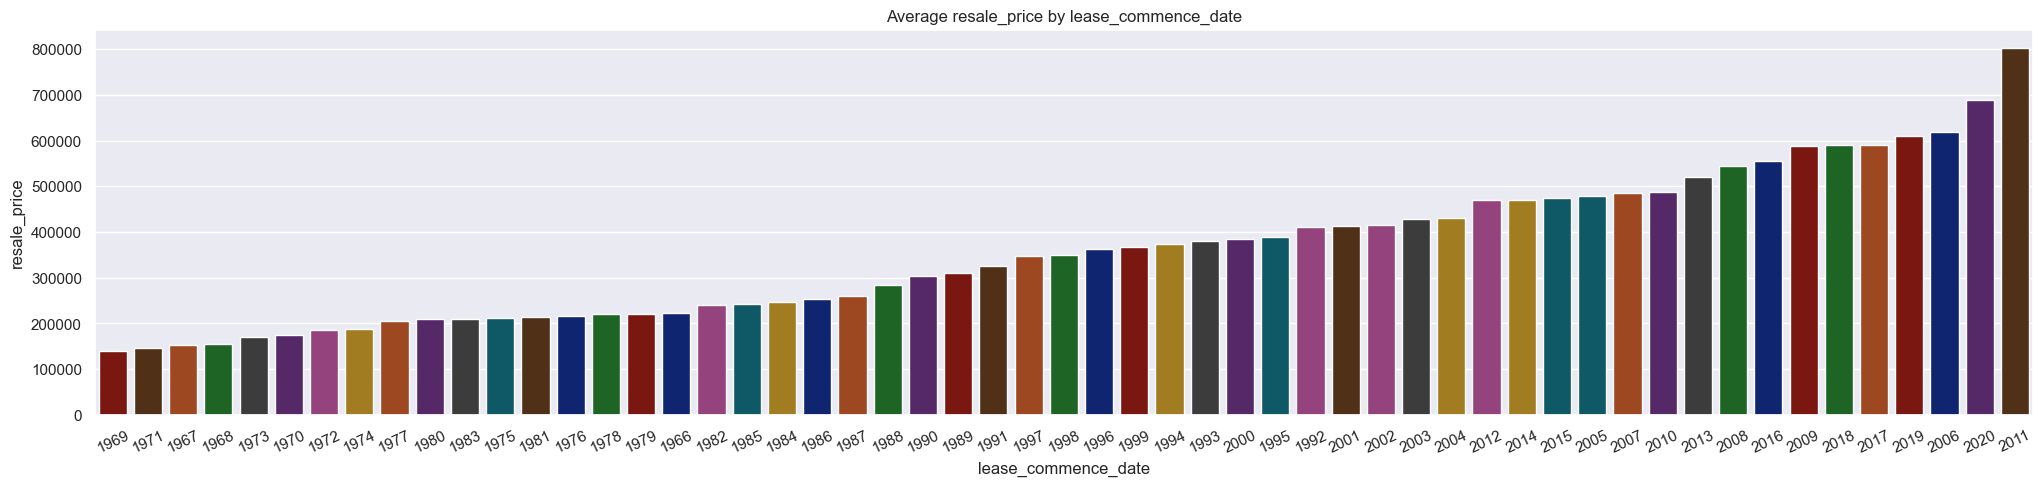

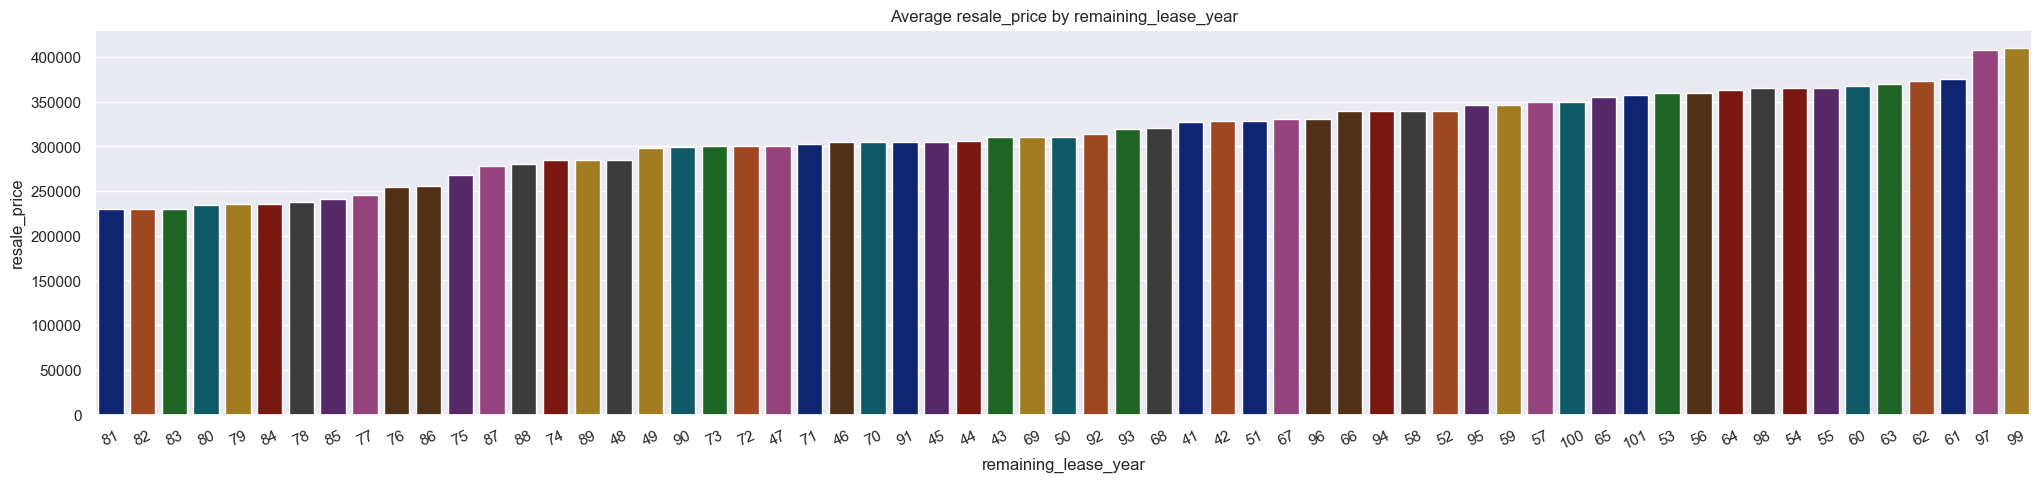

In [142]:
sns.set_theme( font_scale=1)  
for i in categorical:
    plt.figure(figsize=(25, 5))
    data=df1.groupby(i,observed=False)['resale_price'].median().reset_index().sort_values('resale_price')
    sns.barplot(data=data, x=data[i], y=data['resale_price'],hue=i, order =data[i],legend=False,palette='dark',)
    plt.xticks(rotation=25)
    plt.title(f'Average resale_price by {i}')
    plt.show()

### Pair Plot

<Figure size 1800x2000 with 0 Axes>

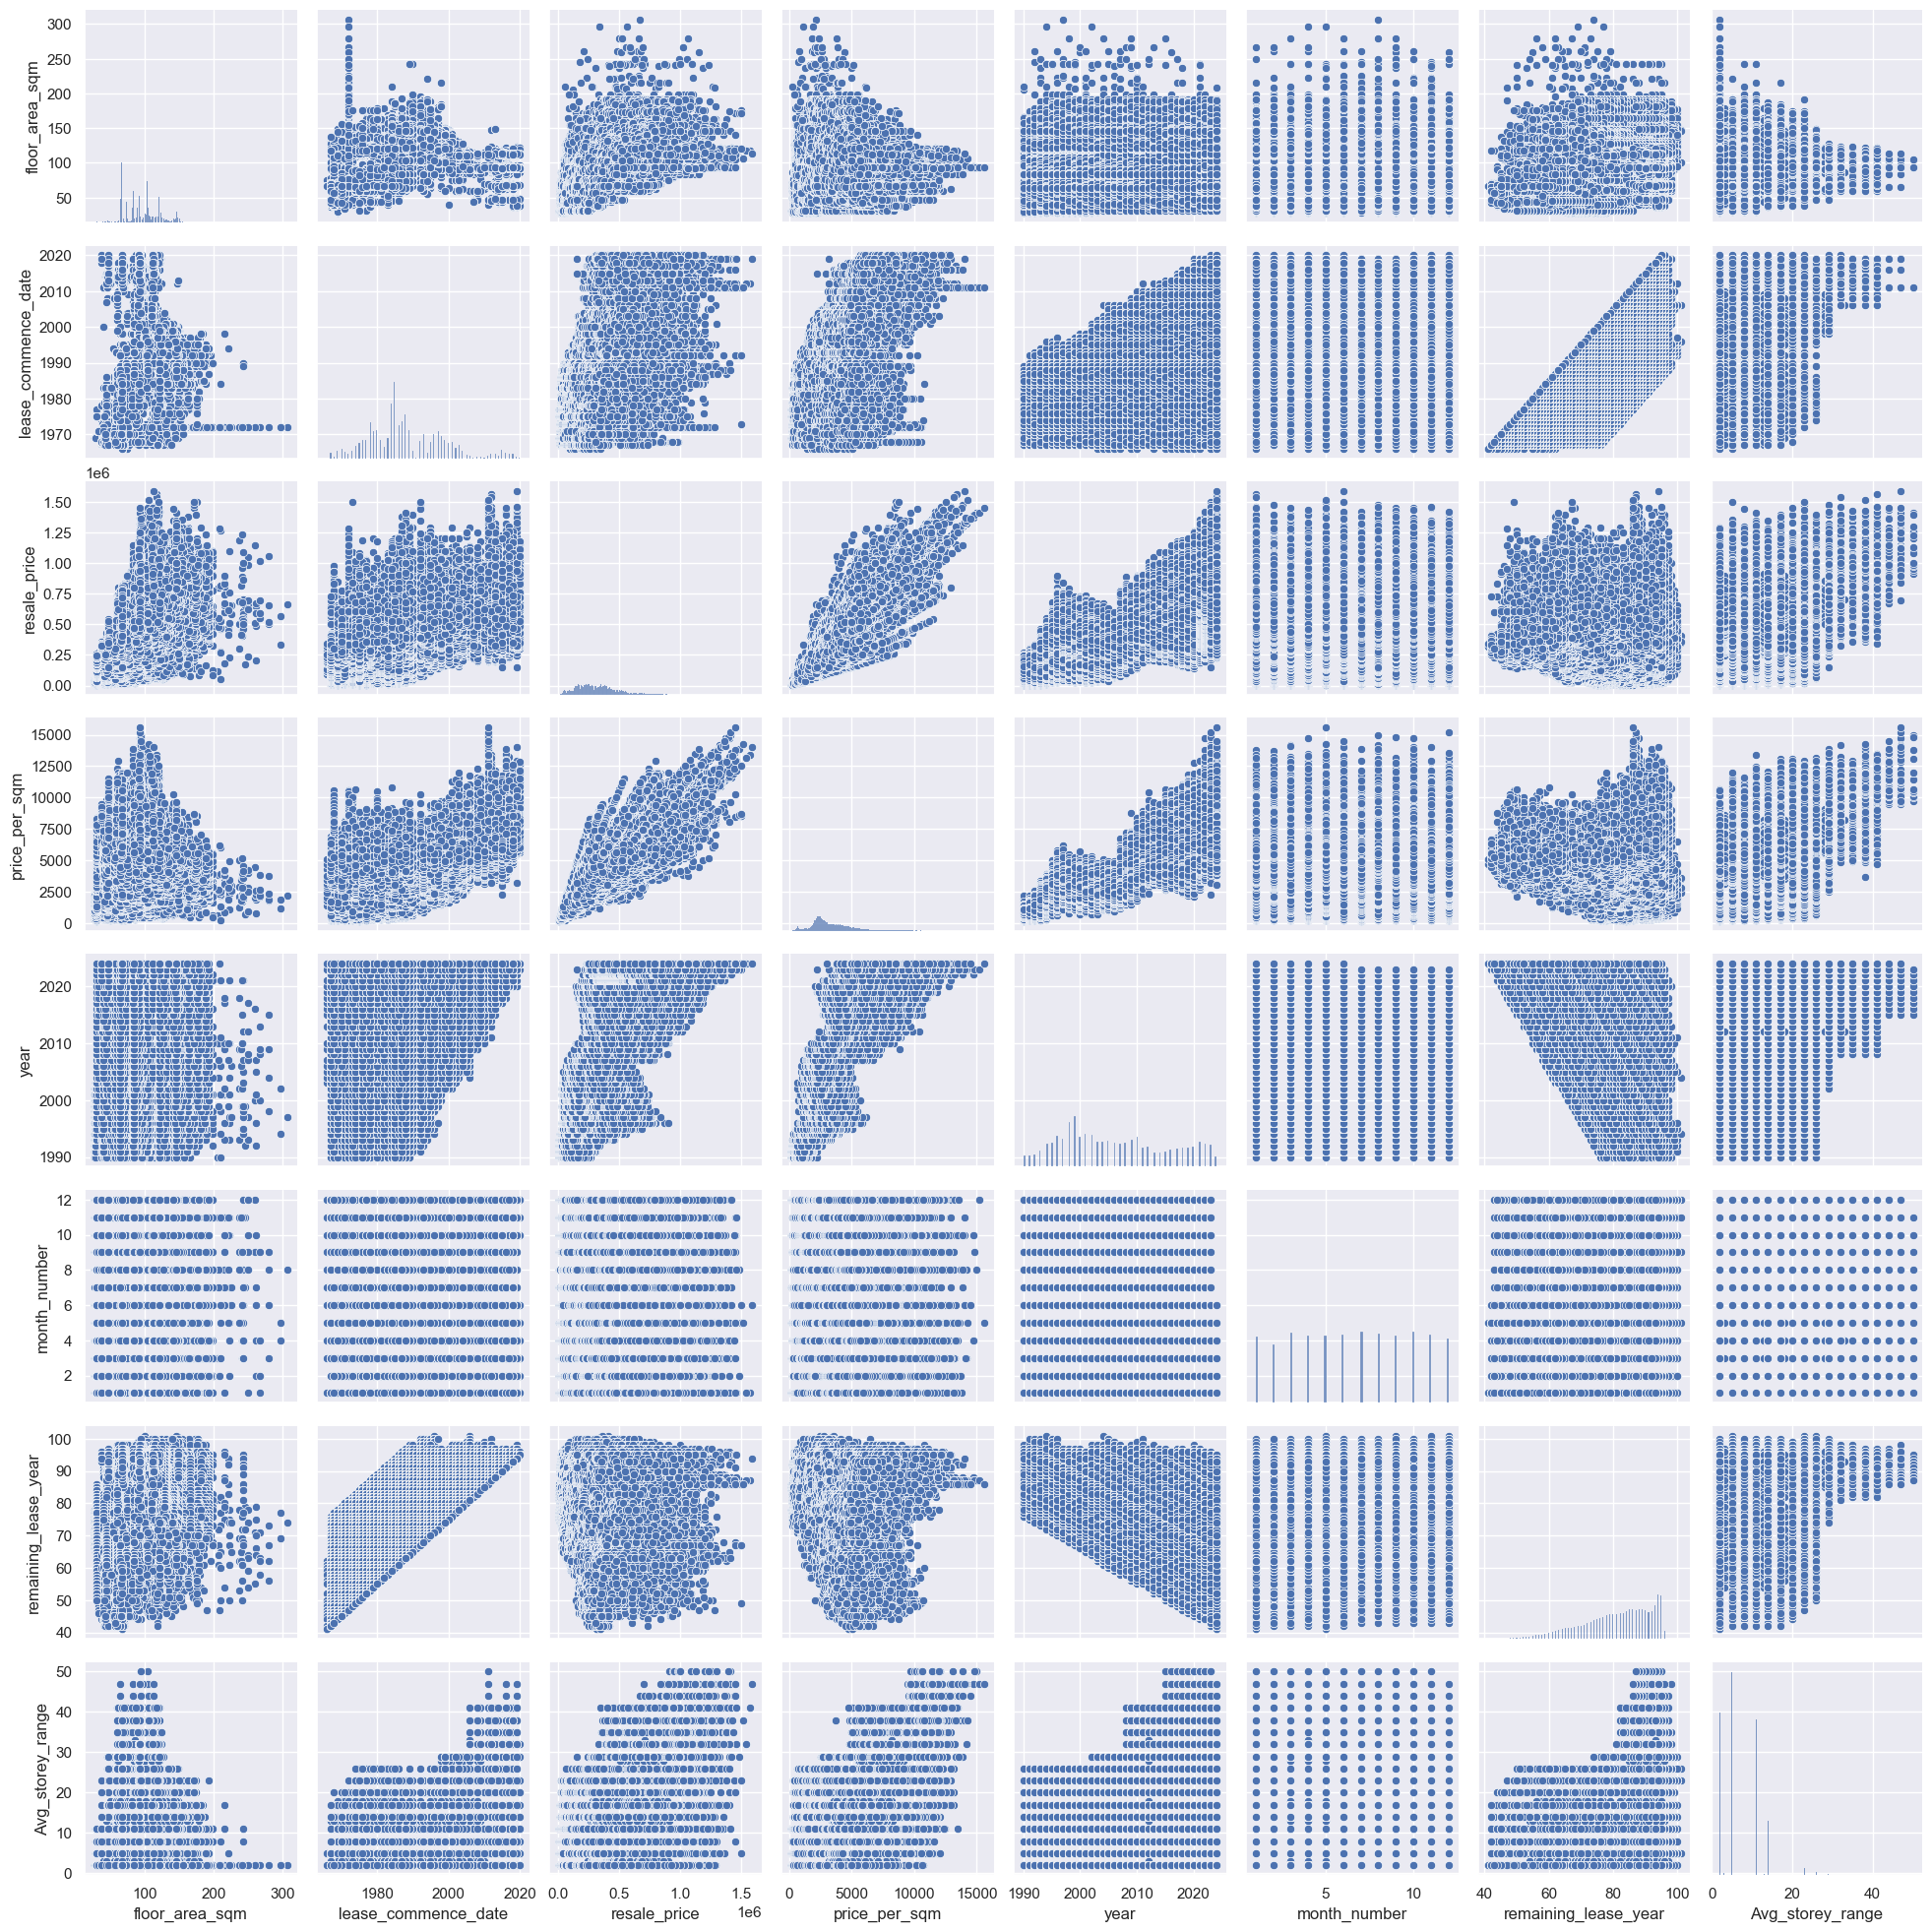

In [143]:
plt.figure(figsize=(18,20))
sns.pairplot(data=df1)
plt.show()

### Resale Price by Flat Type and Lease Commence Date

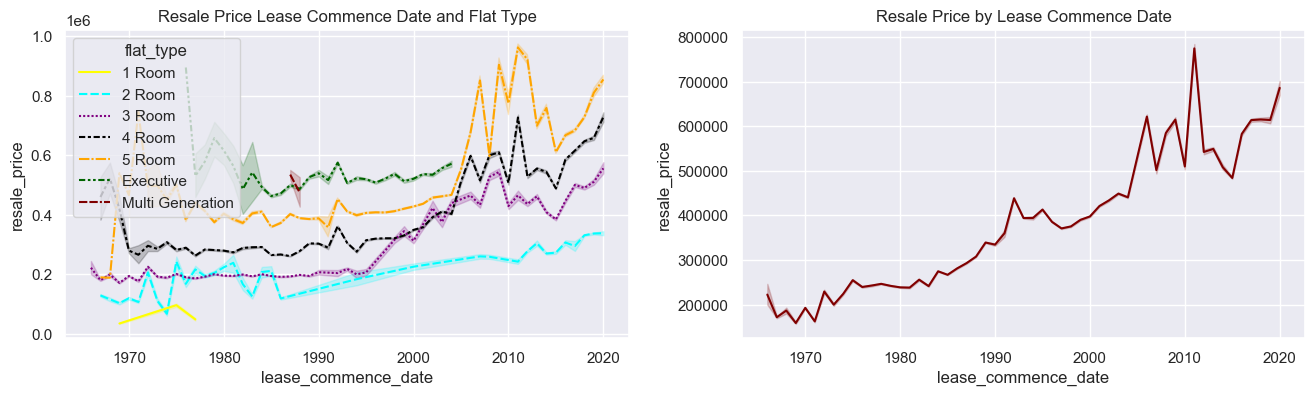

In [164]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.lineplot(data = df1, x ='lease_commence_date', y = 'resale_price',hue='flat_type',style="flat_type",palette=['yellow','aqua','purple','black','orange','darkgreen','maroon'])
plt.title("Resale Price Lease Commence Date and Flat Type")

plt.subplot(1,2,2)
sns.lineplot(data = df1, x ='lease_commence_date', y = 'resale_price',color='maroon')
plt.title("Resale Price by Lease Commence Date")

plt.show()

### Resale Price by Year and Flat Type

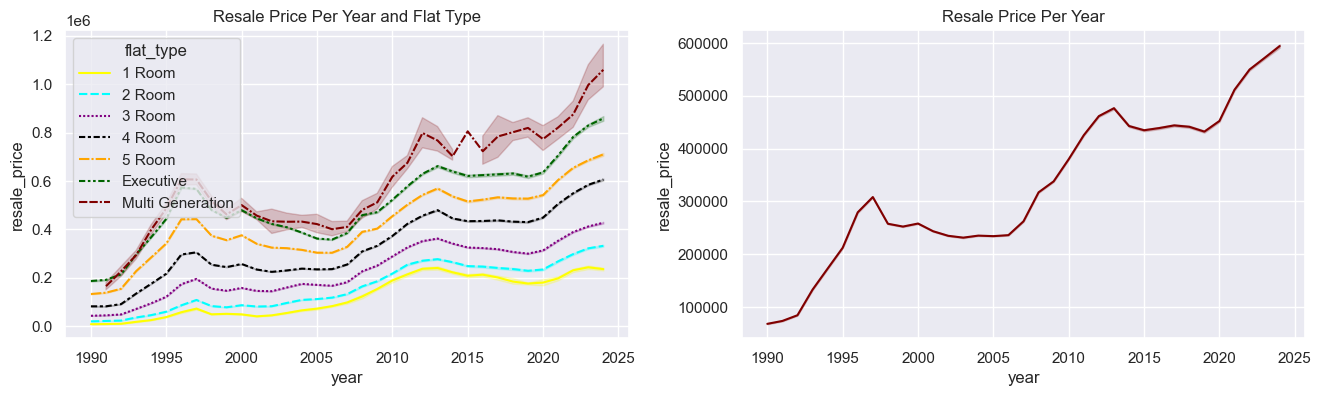

In [165]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.lineplot(data = df1, x ='year', y = 'resale_price',hue='flat_type',style="flat_type",palette=['yellow','aqua','purple','black','orange','darkgreen','maroon'])
plt.title("Resale Price Per Year and Flat Type")

plt.subplot(1,2,2)
sns.lineplot(data = df1, x ='year', y = 'resale_price',color='maroon')
plt.title("Resale Price Per Year")

plt.show()

### Resale Price by Avg_storey_range and Flat Type

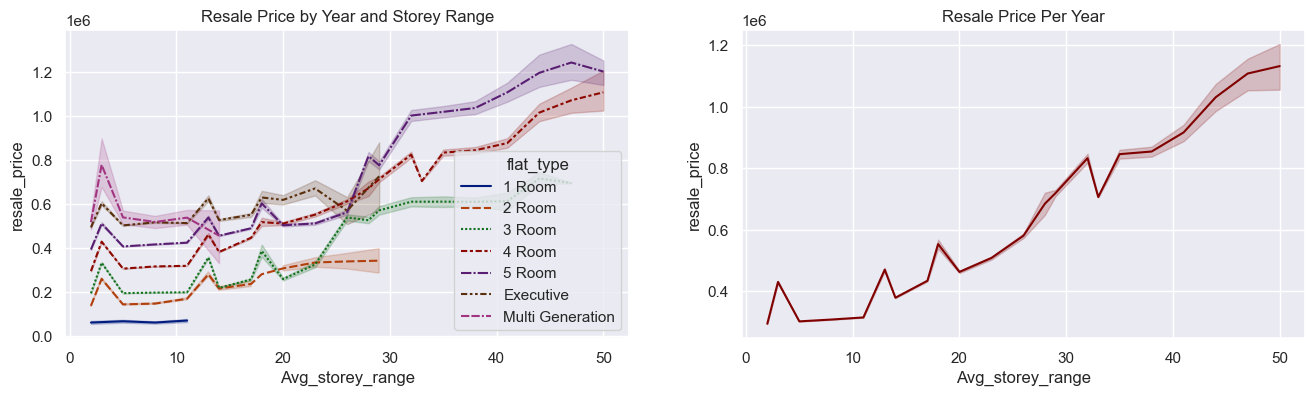

In [167]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.lineplot(data = df1, x ='Avg_storey_range', y = 'resale_price',hue='flat_type',style="flat_type",palette='dark')
plt.title("Resale Price by Year and Storey Range")

plt.subplot(1,2,2)
sns.lineplot(data = df1, x ='Avg_storey_range', y = 'resale_price',color='maroon')
plt.title("Resale Price Per Year")

plt.show()

### Resale Price by remaining_lease_year and Flat Type

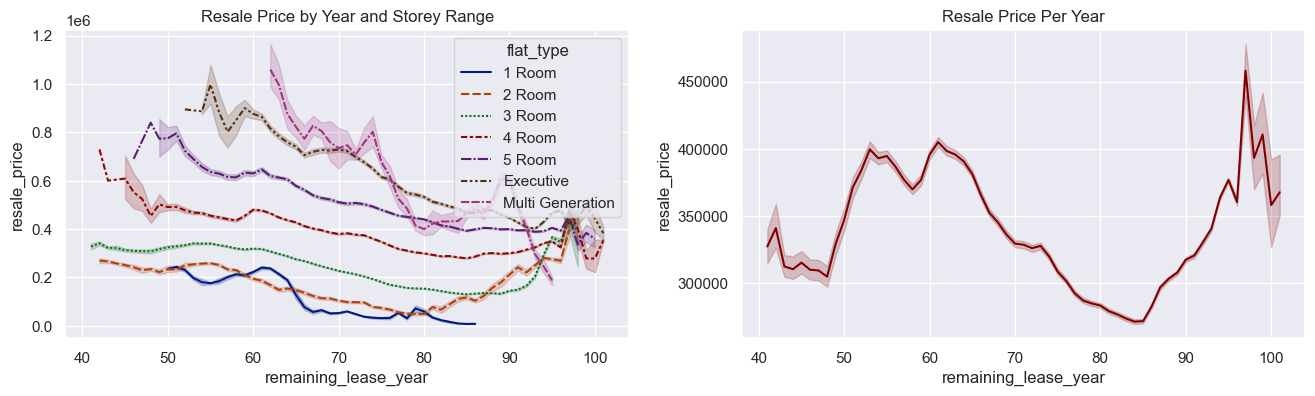

In [170]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.lineplot(data = df1, x ='remaining_lease_year', y = 'resale_price',hue='flat_type',style="flat_type",palette='dark')
plt.title("Resale Price by Year and Storey Range")

plt.subplot(1,2,2)
sns.lineplot(data = df1, x ='remaining_lease_year', y = 'resale_price',color='maroon')
plt.title("Resale Price Per Year")

plt.show()

### Normality Test

In [173]:
variables = ['floor_area_sqm', 'lease_commence_date', 'resale_price',]

for var in continuous:
    stat, p = kstest(df1[var], 'norm', args=(df1[var].mean(), df1[var].std()))
    print(f'K-S Test for {var}: Statistics={stat}, p={p}')
    if p > 0.05:
        print(f'{var} looks normally distributed.\n')
    else:
        print(f'{var} does not look normally distributed.\n')


K-S Test for floor_area_sqm: Statistics=0.09941099273674198, p=0.0
floor_area_sqm does not look normally distributed.

K-S Test for resale_price: Statistics=0.059450367412785865, p=0.0
resale_price does not look normally distributed.

K-S Test for price_per_sqm: Statistics=0.09489535653294501, p=0.0
price_per_sqm does not look normally distributed.



In [174]:
from scipy.stats import skew, kurtosis

for var in continuous:
    skewness = skew(df1[var])
    kurt = kurtosis(df1[var])
    print(f'{var} - Skewness: {skewness}, Kurtosis: {kurt}')
    if abs(skewness) < 0.5 and abs(kurt) < 3:
        print(f'{var} looks normally distributed.\n')
    else:
        print(f'{var} does not look normally distributed.\n')

floor_area_sqm - Skewness: 0.3660709490993199, Kurtosis: -0.34641220087085633
floor_area_sqm looks normally distributed.

resale_price - Skewness: 0.9421620158728324, Kurtosis: 1.373502157753908
resale_price does not look normally distributed.

price_per_sqm - Skewness: 1.0728419731408791, Kurtosis: 2.0848609936408025
price_per_sqm does not look normally distributed.



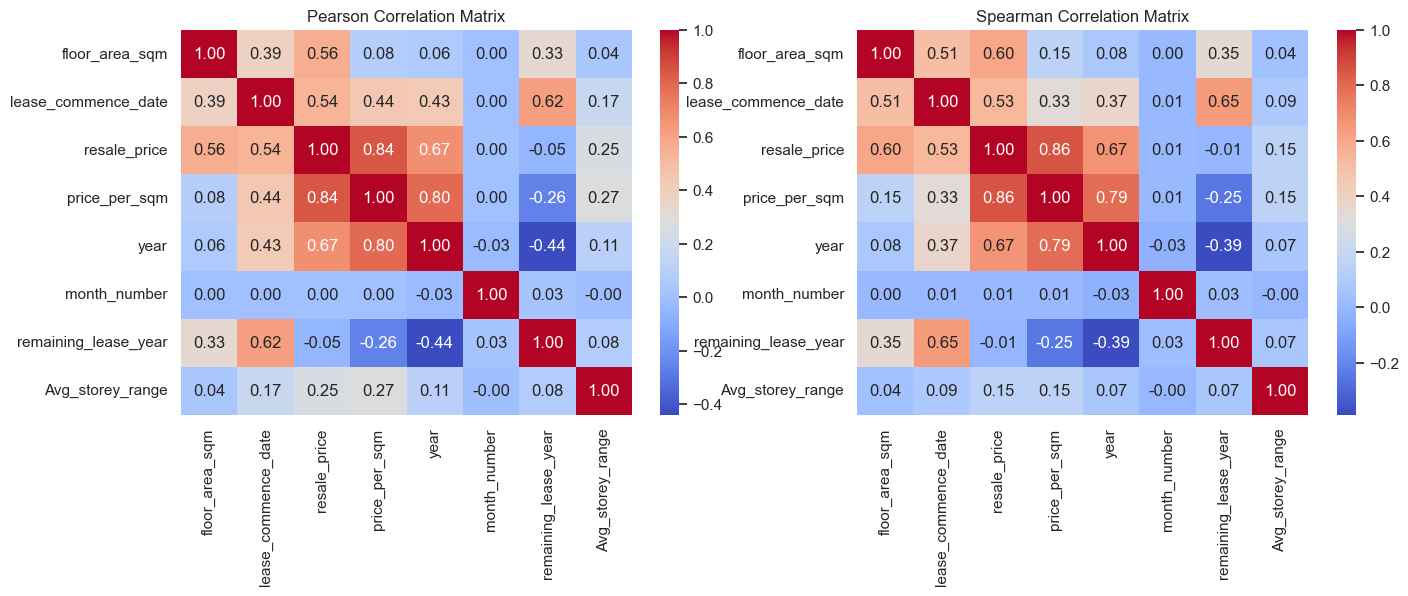

In [175]:
cor_col = df1.select_dtypes(include='number')
correlation_matrix_pear = cor_col.corr()
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.heatmap(correlation_matrix_pear,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Pearson Correlation Matrix')


cor_col = df1.select_dtypes(include='number')
correlation_matrix = cor_col.corr(method='spearman')
plt.subplot(1,2,2)
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

### Experimenting with a few types of data transformation techniques to see which one suits best.

In [180]:
skew_dict=dict(df1[continuous].skew())
skew_dict

{'floor_area_sqm': 0.3660726547241211,
 'resale_price': 0.942163539645637,
 'price_per_sqm': 1.072843708264345}

In [181]:
def boxcox_transform(x):
    # Perform Box-Cox transformation
    transformed_data,lmbda = boxcox(x)
    return transformed_data,lmbda

In [182]:
method_functions =  {
    'log': np.log,
    'square': np.sqrt,
    'rec': lambda x: 1 / x,
    'sig': lambda x: 1 / (1 + np.exp(-x)),
    'pow': lambda x: np.power(x, 2),
    'exp':lambda x: x**(1/5),
    'boxcox': boxcox_transform,
        }

def skewness_checker(df, column, method):
    normalized_df=pd.DataFrame()

    for method_name, func in method_functions.items():
        for col in column:

            new_column = f'{col}_{method_name}'
            if method_name in ['boxcox']:
                transformed_values = func(df[col])[0]
            else:
                transformed_values = func(df[col])
            normalized_df[new_column] = transformed_values

    return normalized_df

In [185]:
normalized_df=skewness_checker(df1, continuous, method_functions)
normalized_df

floor_area_sqm_log  resale_price_log  price_per_sqm_log  \
0                 3.433987          9.104980           5.670993   
1                 3.433987          8.699515           5.265528   
2                 3.433987          8.987197           5.553210   
3                 3.433987          8.699515           5.265528   
4                 4.290460         10.762149           6.471690   
...                    ...               ...                ...   
181257            4.718499         13.511699           8.793200   
181258            4.804021         13.429848           8.625827   
181259            4.983607         13.579788           8.596182   
181260            4.983607         13.815511           8.831904   
181261            4.983607         13.815511           8.831904   

        floor_area_sqm_square  resale_price_square  price_per_sqm_square  \
0                    5.567764            94.868330             17.038855   
1                    5.567764            77.459667             13.912167   
2                    5.567764            89.442719             16.064387   
3                    5.567764            77.459667             13.912167   
4                    8.544003           217.255610             25.427846   
...                       ...                  ...                   ...   
181257              10.583005           859.069264             81.174415   
181258              11.045361           824.621125             74.657689   
181259              12.083046           888.819442             73.559220   
181260              12.083046          1000.000000             82.760589   
181261              12.083046          1000.000000             82.760589   

        floor_area_sqm_rec  resale_price_rec  price_per_sqm_rec  \
0                 0.032258          0.000111           0.003444   
1                 0.032258          0.000167           0.005167   
2                 0.032258          0.000125           0.003875   
3                 0.032258          0.000167           0.005167   
4                 0.013699          0.000021           0.001547   
...                    ...               ...                ...   
181257            0.008929          0.000001           0.000152   
181258            0.008197          0.000001           0.000179   
181259            0.006849          0.000001           0.000185   
181260            0.006849          0.000001           0.000146   
181261            0.006849          0.000001           0.000146   

        floor_area_sqm_sig  ...  price_per_sqm_sig  floor_area_sqm_pow  \
0                      1.0  ...                1.0               961.0   
1                      1.0  ...                1.0               961.0   
2                      1.0  ...                1.0               961.0   
3                      1.0  ...                1.0               961.0   
4                      1.0  ...                1.0              5329.0   
...                    ...  ...                ...                 ...   
181257                 1.0  ...                1.0             12544.0   
181258                 1.0  ...                1.0             14884.0   
181259                 1.0  ...                1.0             21316.0   
181260                 1.0  ...                1.0             21316.0   
181261                 1.0  ...                1.0             21316.0   

        resale_price_pow  price_per_sqm_pow  floor_area_sqm_exp  \
0           8.100000e+07       8.428720e+04            1.987341   
1           3.600000e+07       3.746098e+04            1.987341   
2           6.400000e+07       6.659729e+04            1.987341   
3           3.600000e+07       3.746098e+04            1.987341   
4           2.227840e+09       4.180597e+05            2.358656   
...                  ...                ...                 ...   
181257      5.446440e+11       4.341869e+07            2.569470   
181258      4.624000e+11       3.106692e+07            2.613

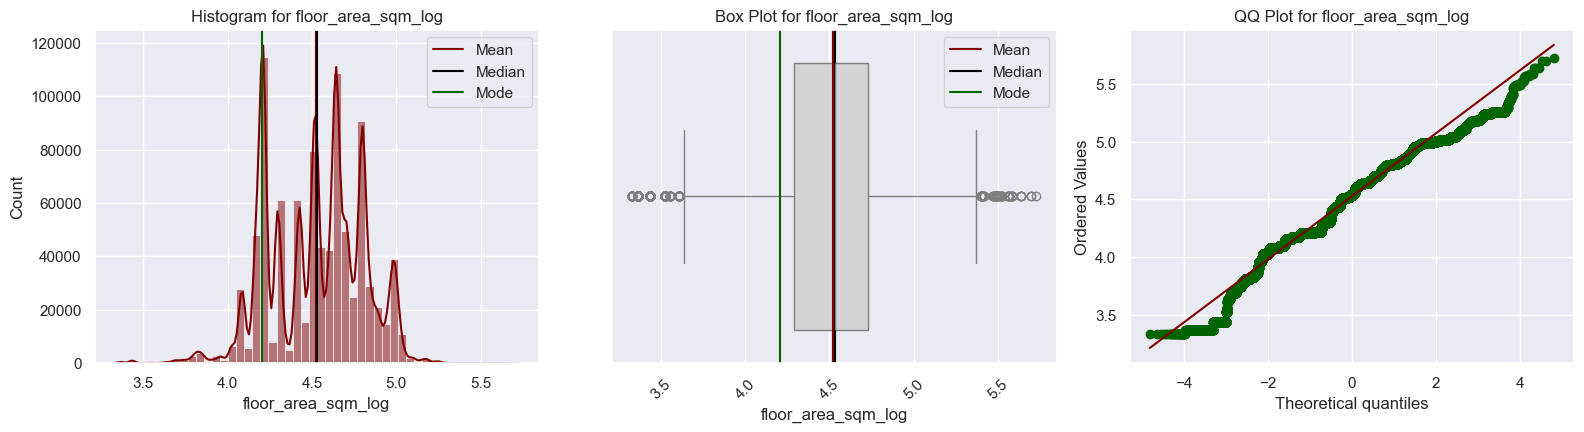


Skew for floor_area_sqm_log is -0.23


Kurtosis for floor_area_sqm_log is -0.36



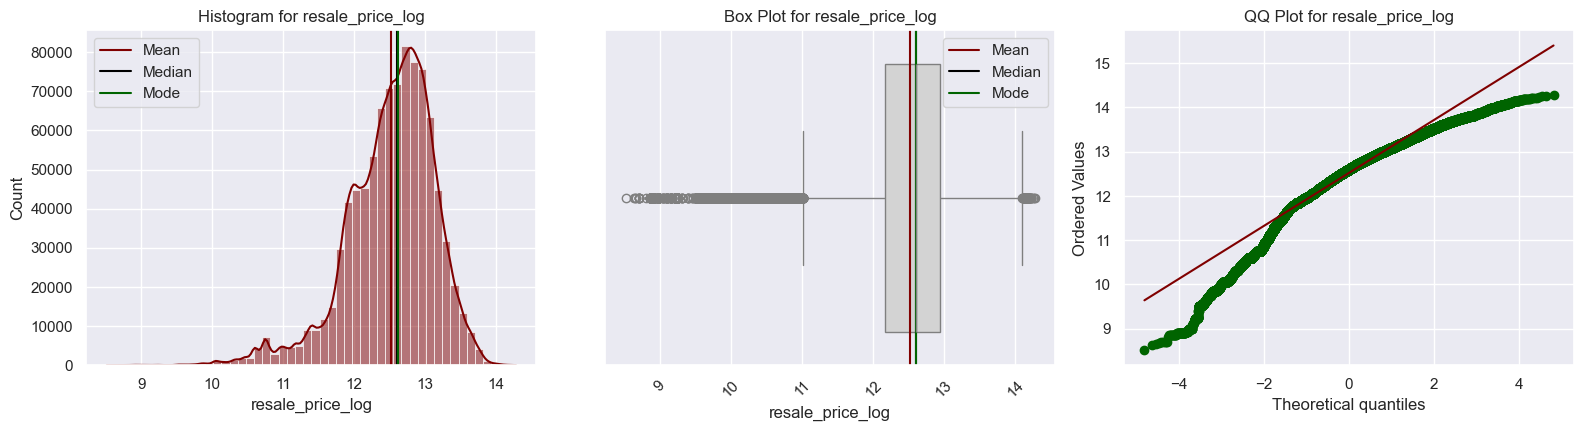


Skew for resale_price_log is -0.92


Kurtosis for resale_price_log is 1.61



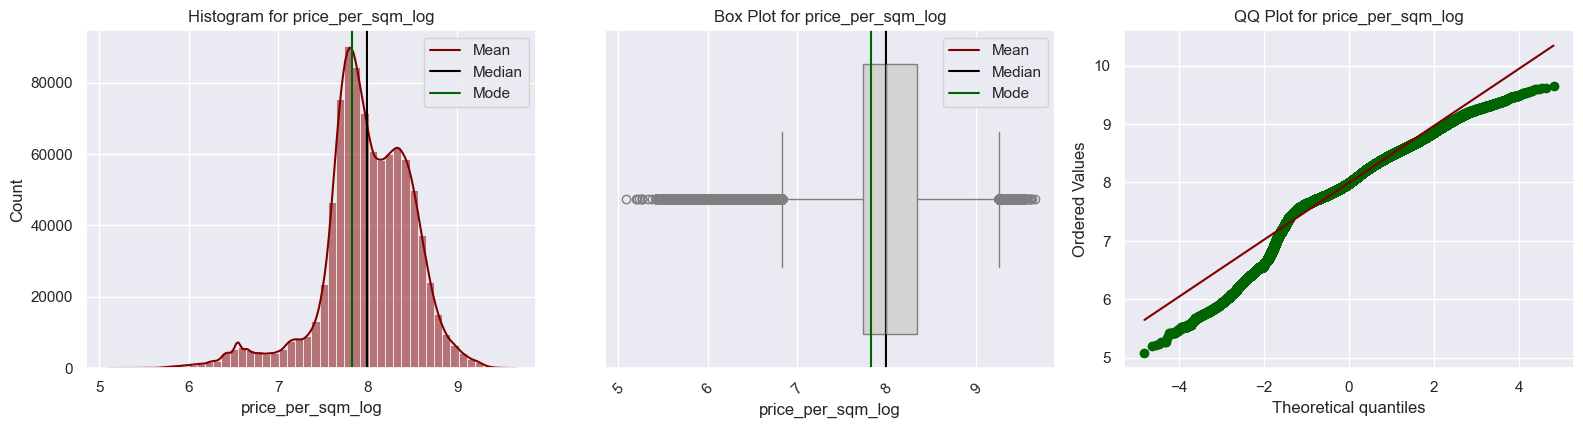


Skew for price_per_sqm_log is -0.82


Kurtosis for price_per_sqm_log is 1.87



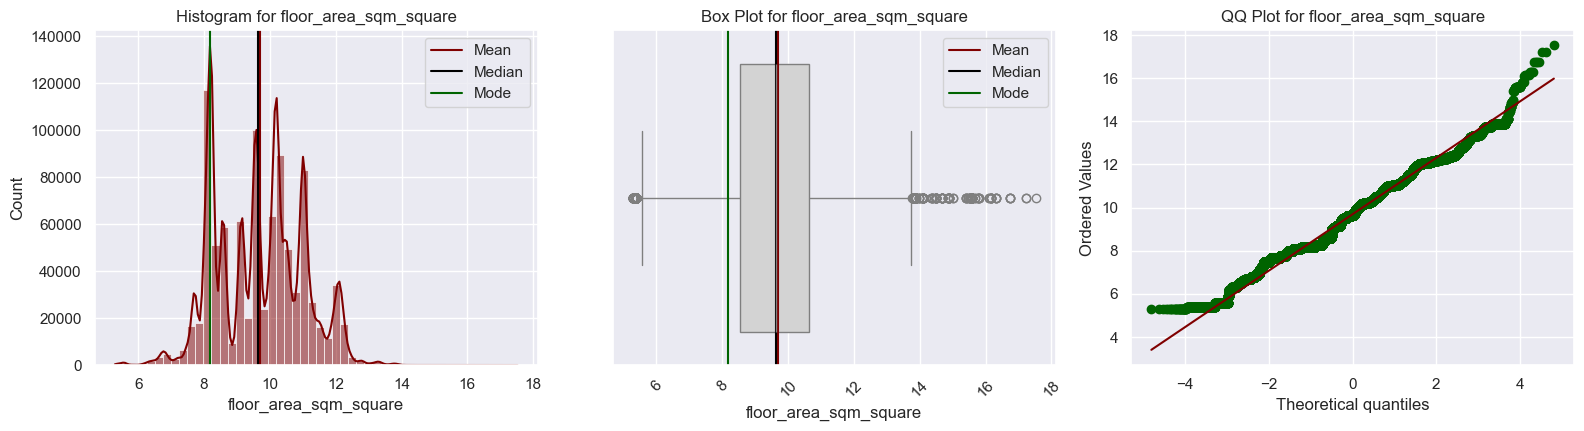


Skew for floor_area_sqm_square is 0.08


Kurtosis for floor_area_sqm_square is -0.57



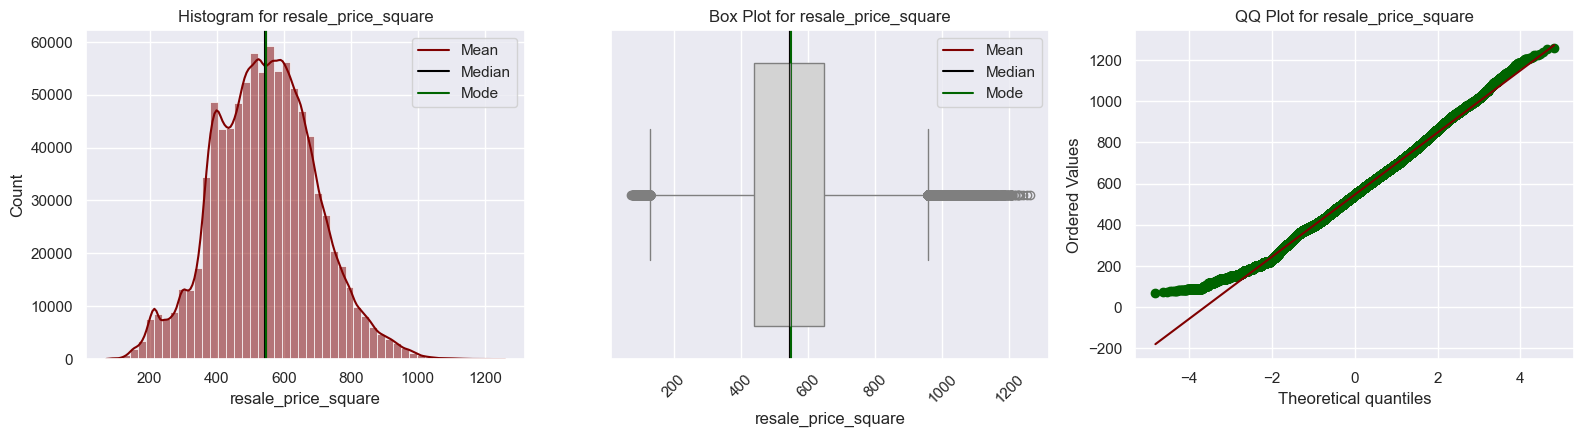


Skew for resale_price_square is 0.11


Kurtosis for resale_price_square is 0.05



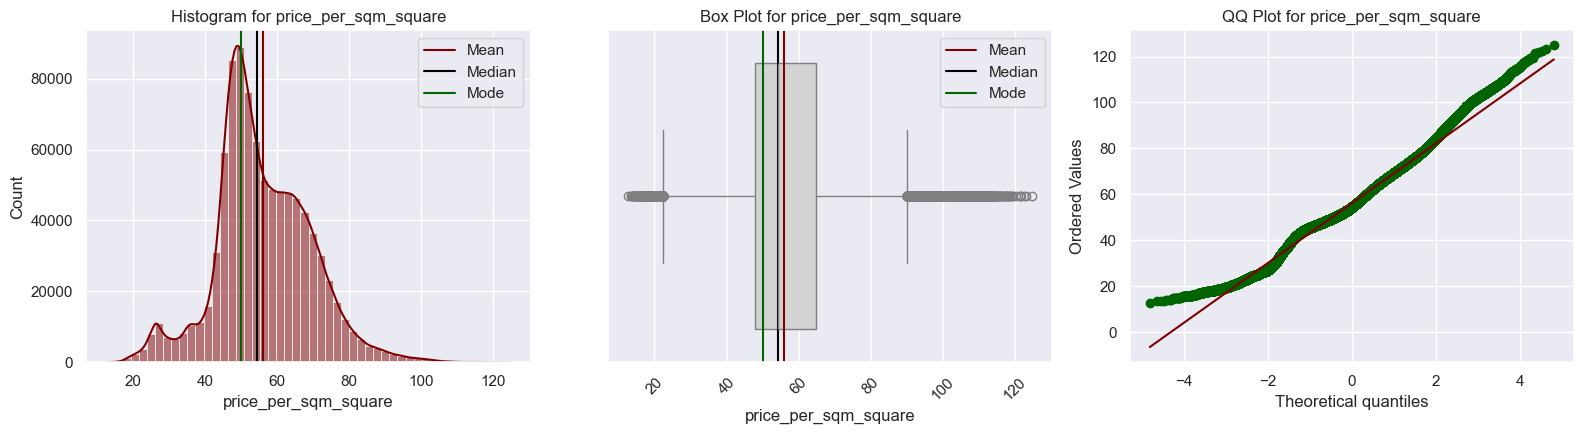


Skew for price_per_sqm_square is 0.22


Kurtosis for price_per_sqm_square is 0.57



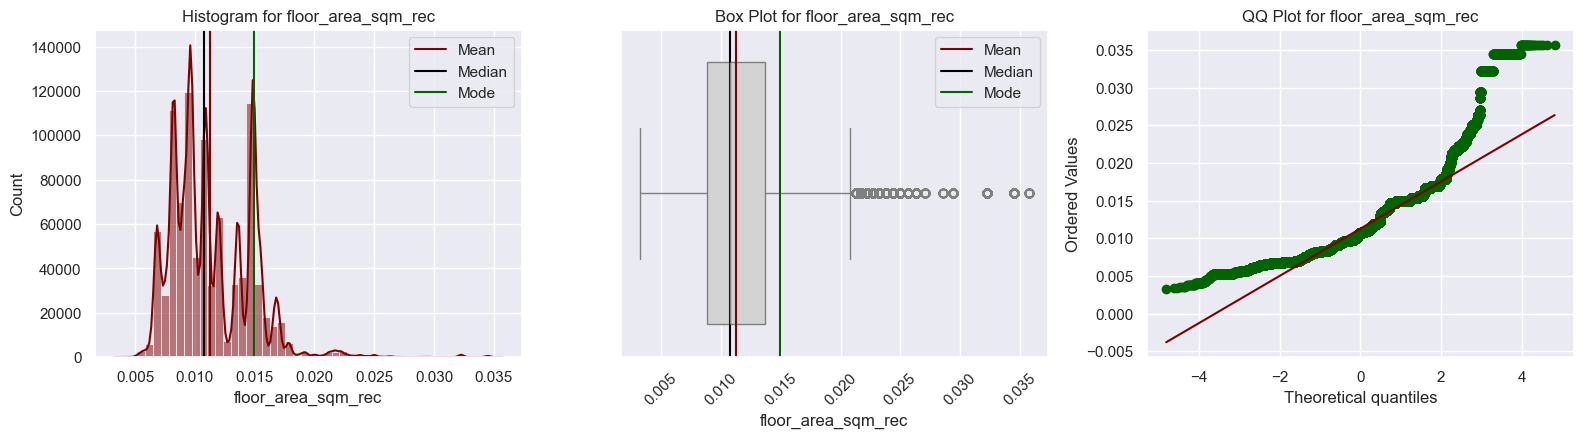


Skew for floor_area_sqm_rec is 1.10


Kurtosis for floor_area_sqm_rec is 3.00



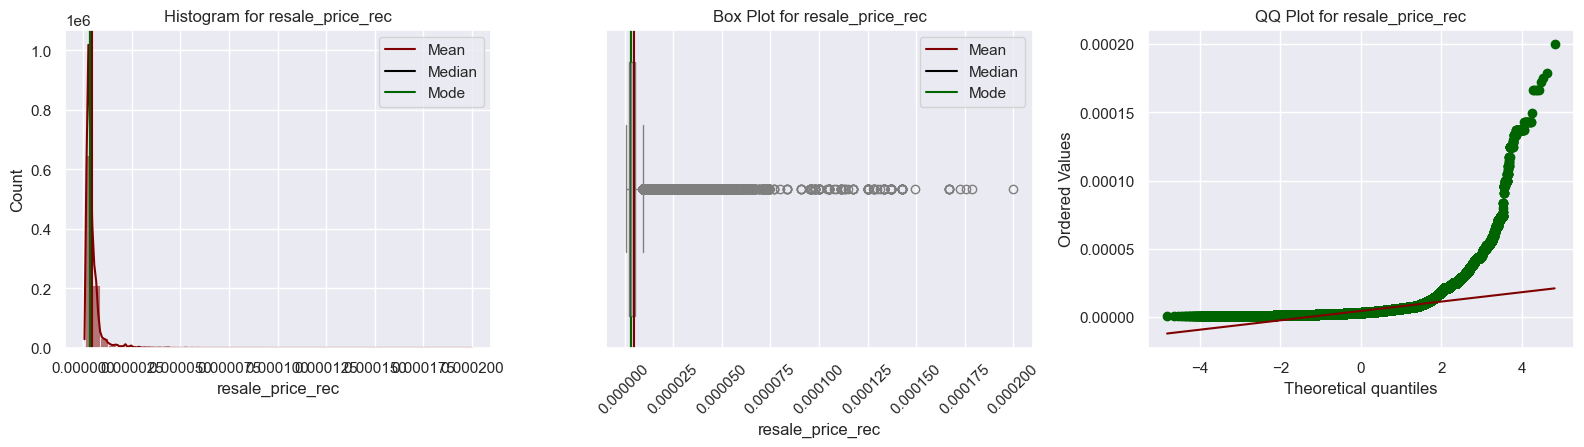


Skew for resale_price_rec is 7.24


Kurtosis for resale_price_rec is 112.40



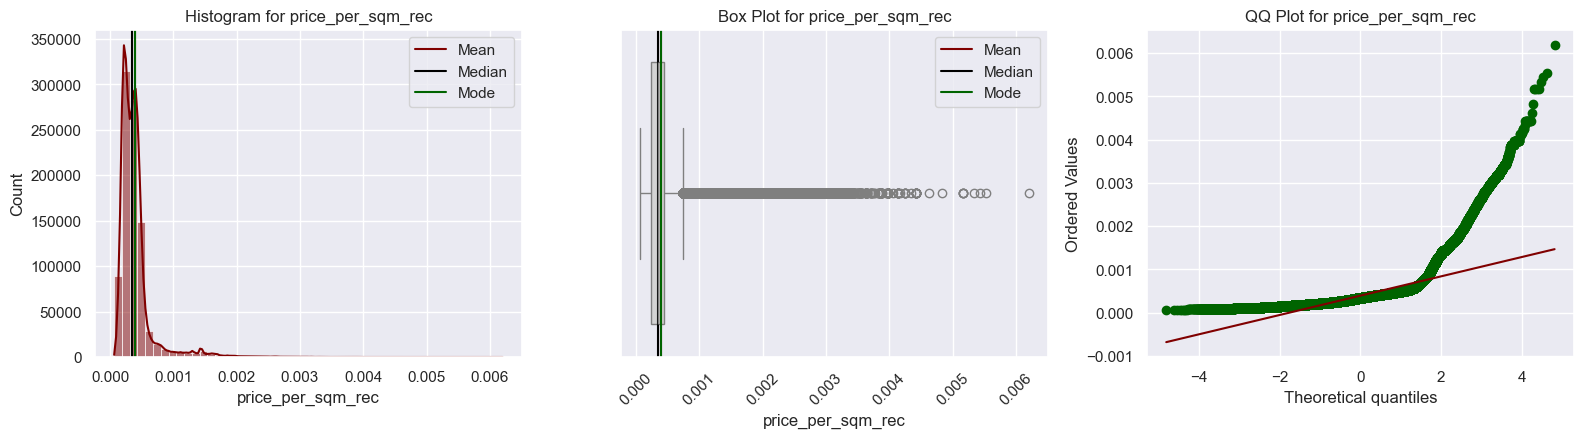


Skew for price_per_sqm_rec is 4.09


Kurtosis for price_per_sqm_rec is 24.62



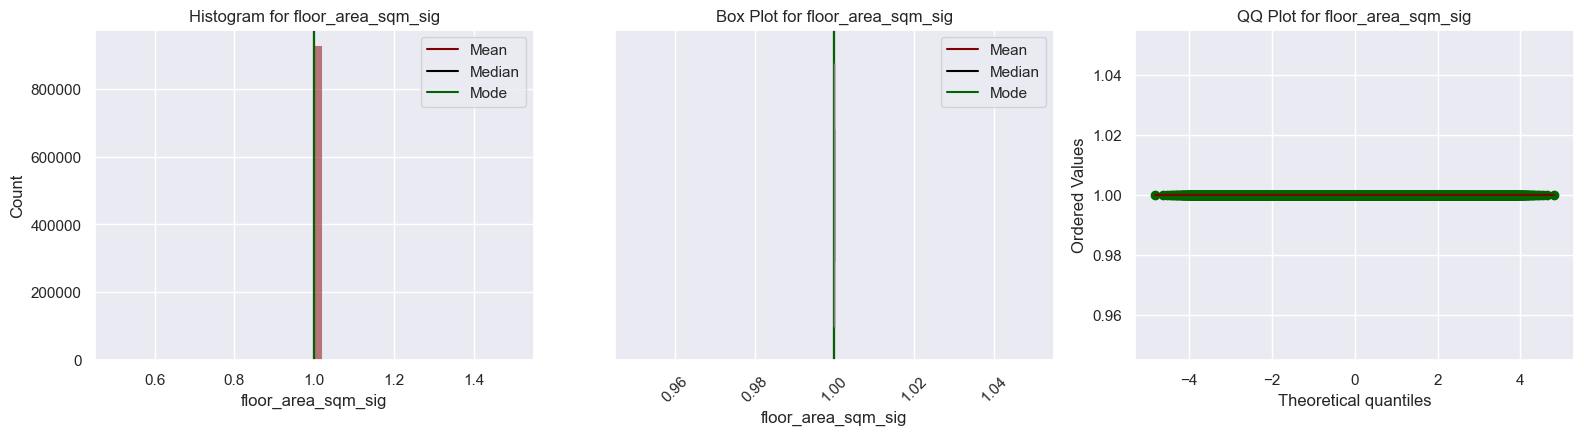


Skew for floor_area_sqm_sig is 0.00


Kurtosis for floor_area_sqm_sig is 0.00



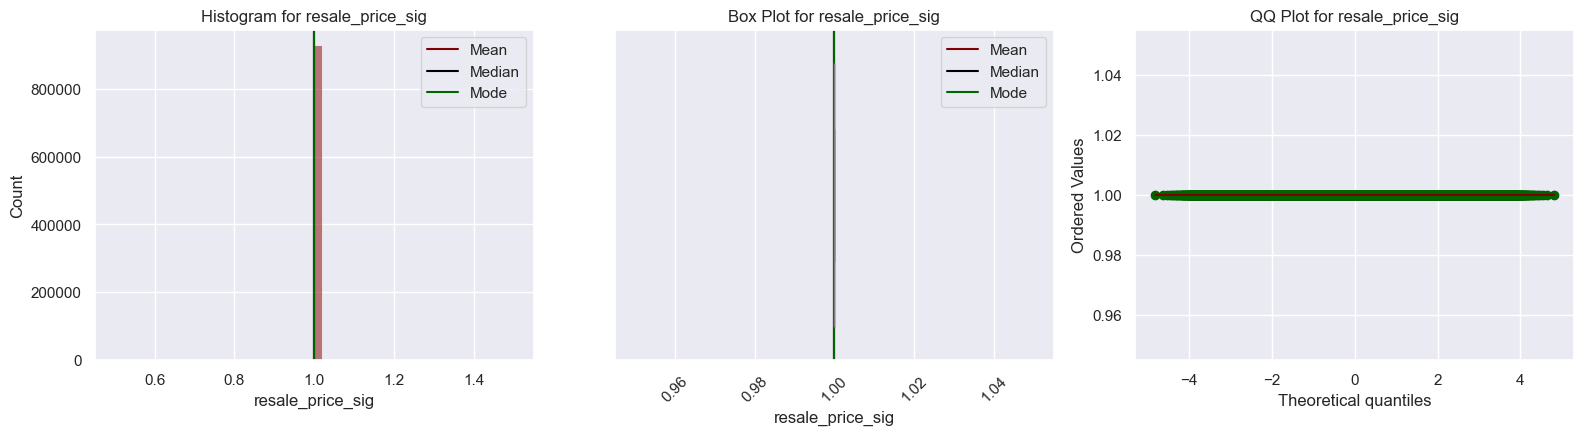


Skew for resale_price_sig is 0.00


Kurtosis for resale_price_sig is 0.00



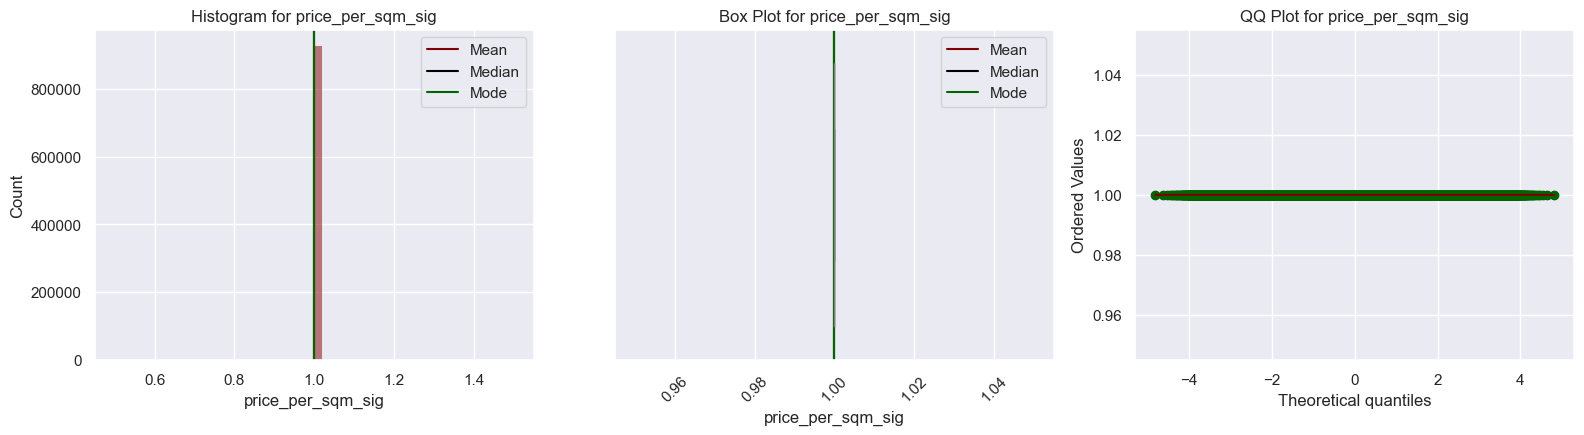


Skew for price_per_sqm_sig is 0.00


Kurtosis for price_per_sqm_sig is 0.00



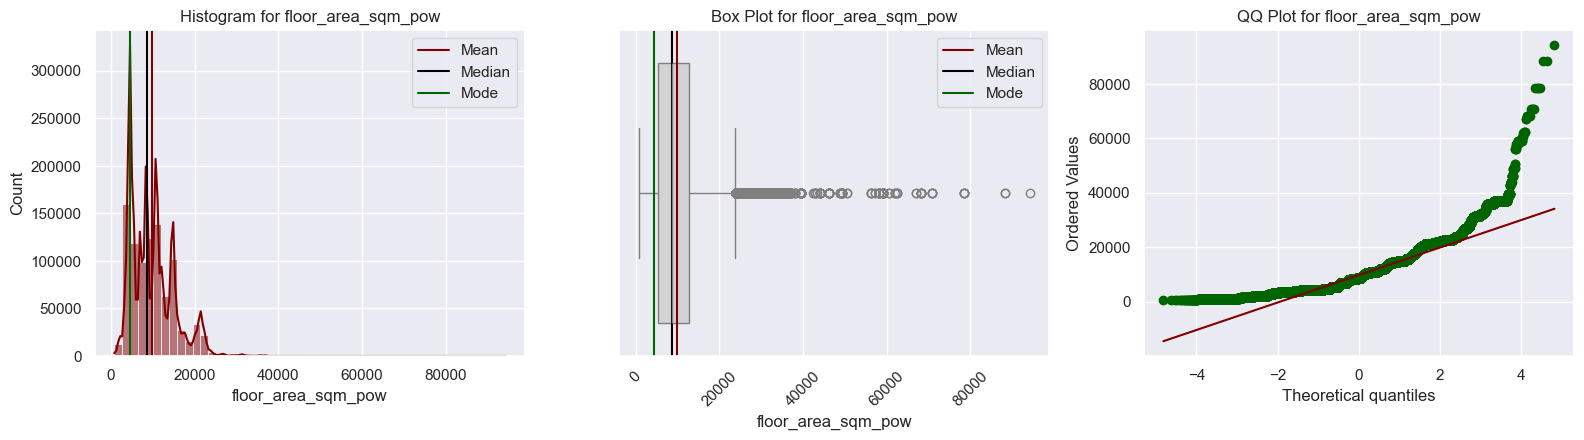


Skew for floor_area_sqm_pow is 1.00


Kurtosis for floor_area_sqm_pow is 1.66



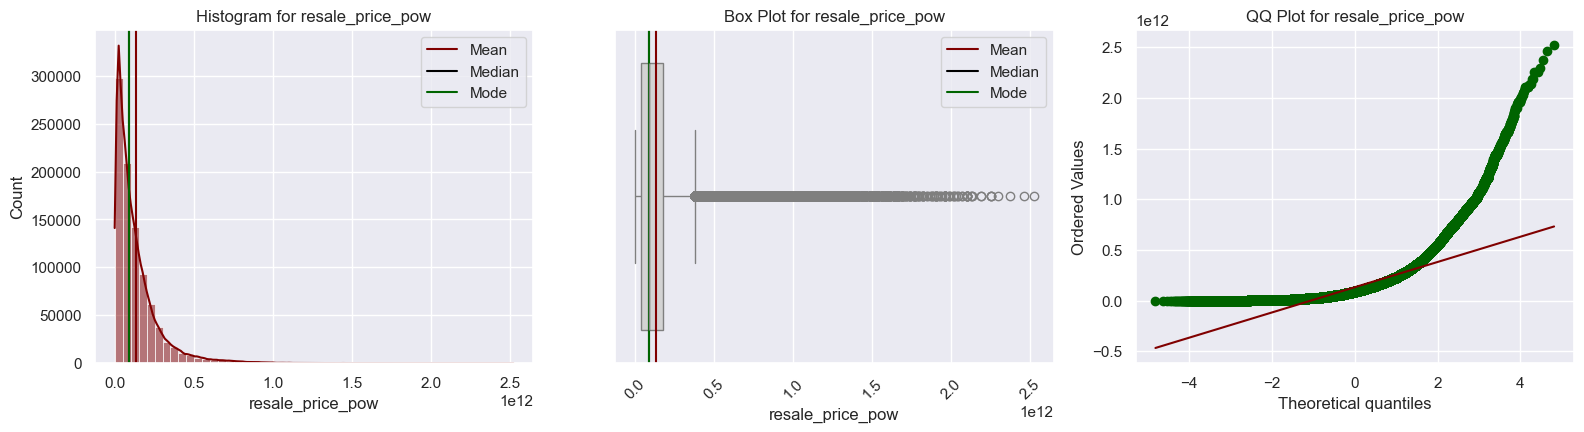


Skew for resale_price_pow is 2.81


Kurtosis for resale_price_pow is 13.23



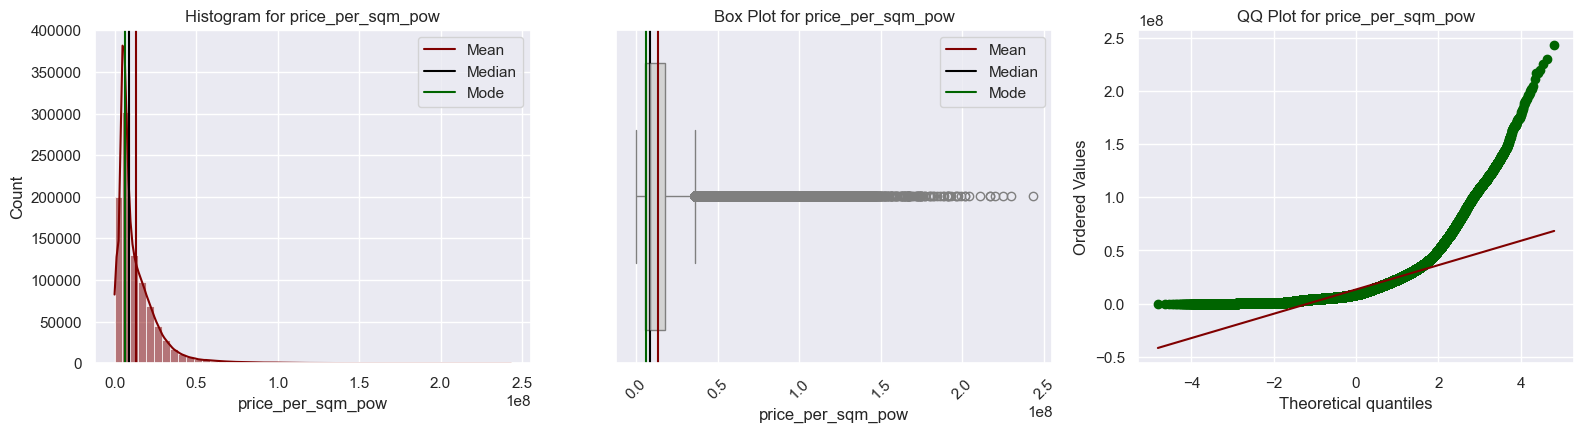


Skew for price_per_sqm_pow is 2.99


Kurtosis for price_per_sqm_pow is 14.96



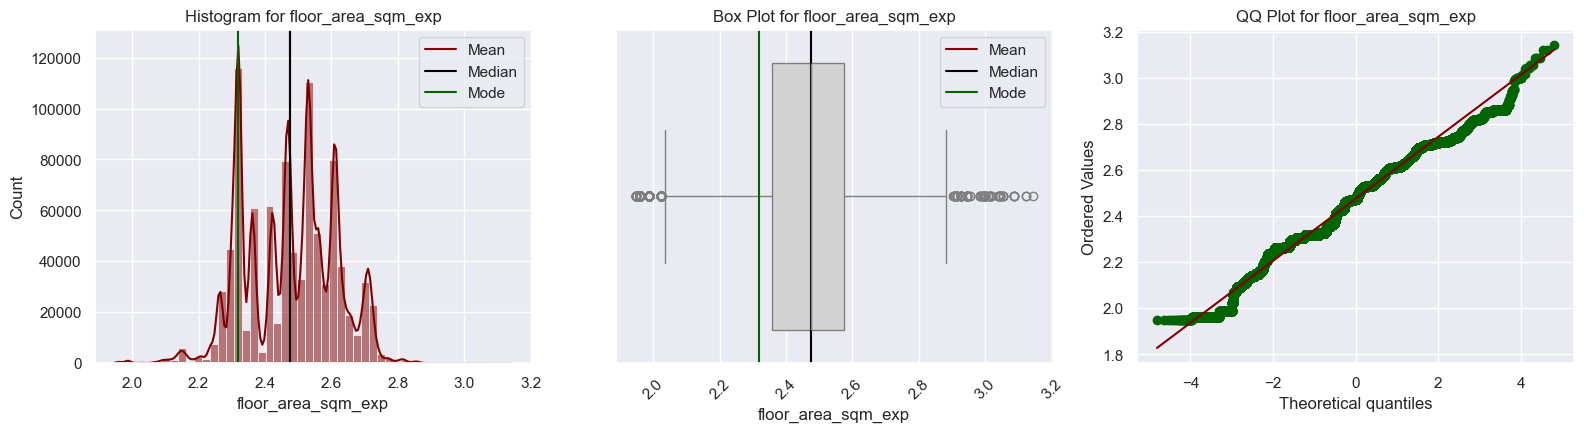


Skew for floor_area_sqm_exp is -0.11


Kurtosis for floor_area_sqm_exp is -0.50



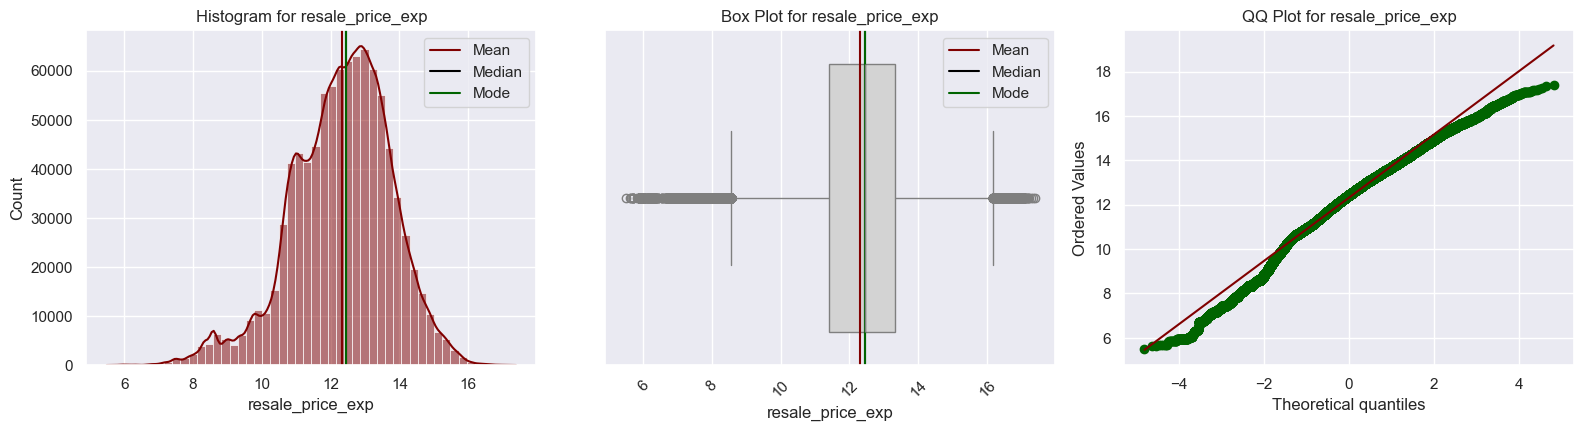


Skew for resale_price_exp is -0.46


Kurtosis for resale_price_exp is 0.48



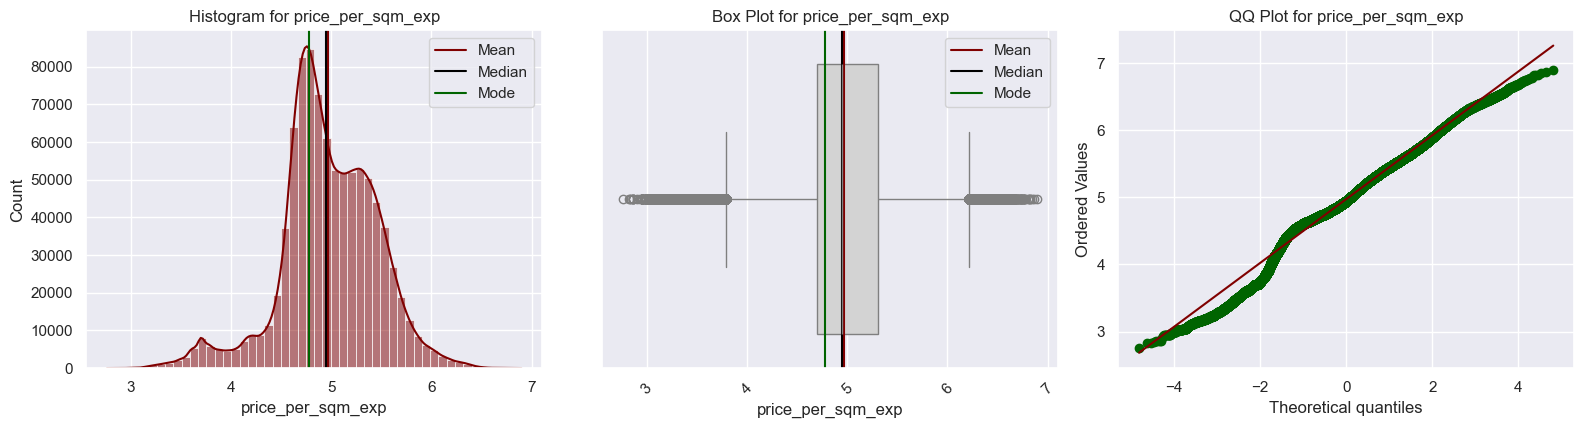


Skew for price_per_sqm_exp is -0.37


Kurtosis for price_per_sqm_exp is 0.93



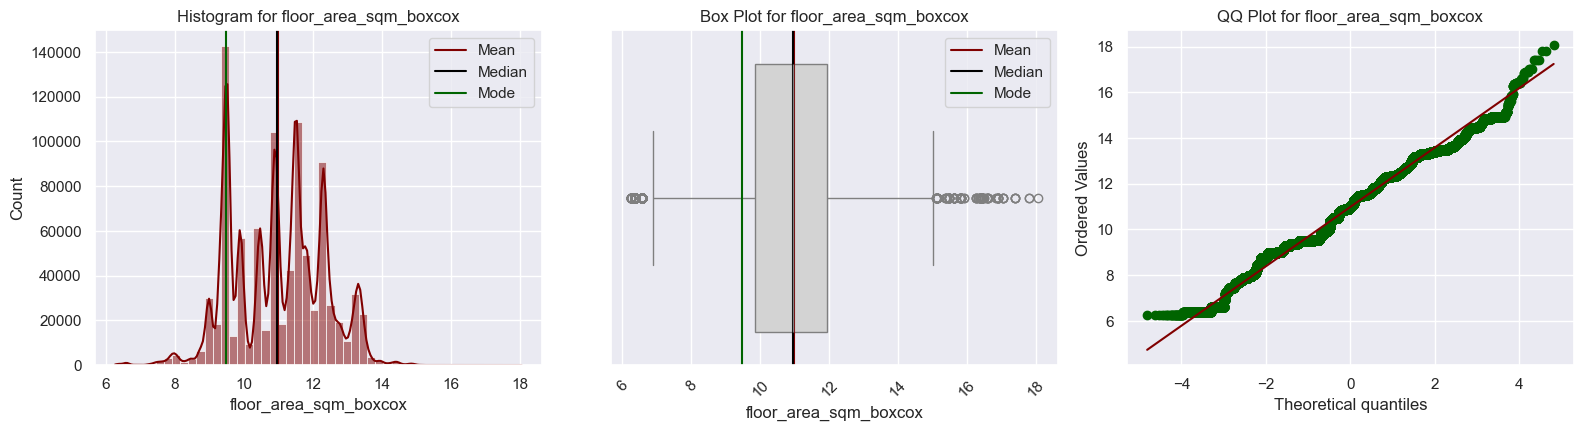


Skew for floor_area_sqm_boxcox is -0.02


Kurtosis for floor_area_sqm_boxcox is -0.55



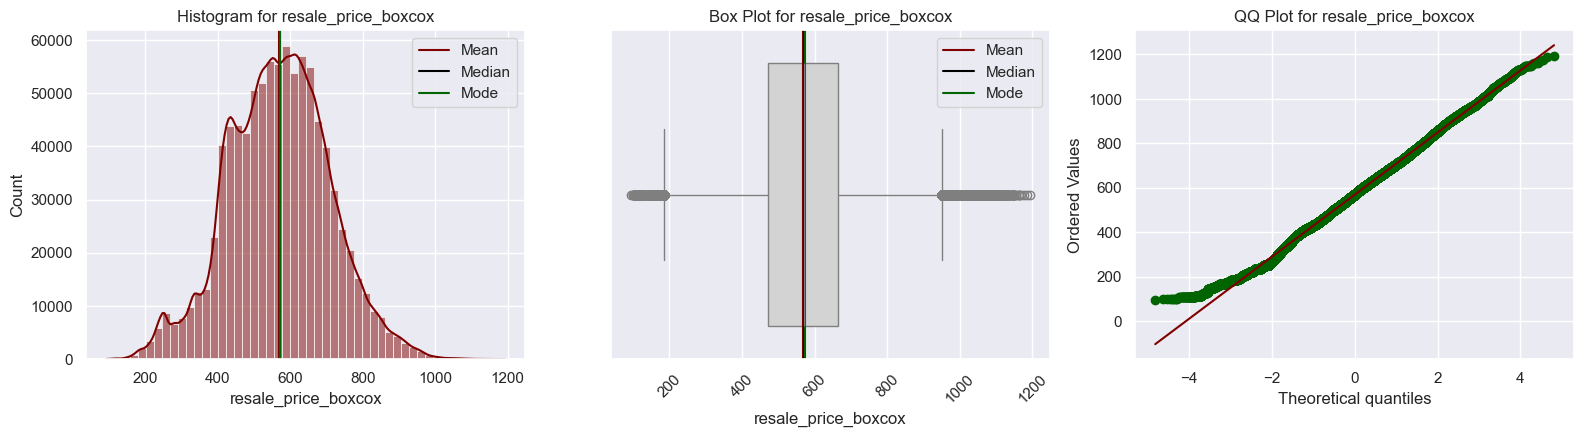


Skew for resale_price_boxcox is -0.00


Kurtosis for resale_price_boxcox is 0.05



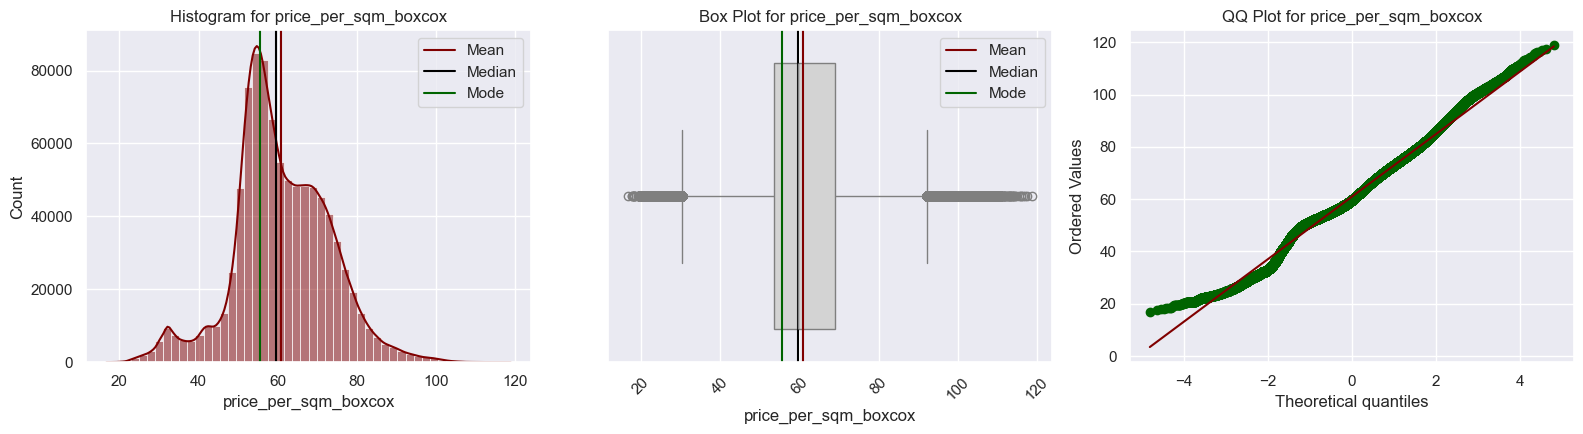


Skew for price_per_sqm_boxcox is 0.04


Kurtosis for price_per_sqm_boxcox is 0.57



{'floor_area_sqm_log': -0.23334388,
 'resale_price_log': -0.9240431018462136,
 'price_per_sqm_log': -0.8184514040088072,
 'floor_area_sqm_square': 0.07508402,
 'resale_price_square': 0.10918464819090822,
 'price_per_sqm_square': 0.218400005682388,
 'floor_area_sqm_rec': 1.1036736,
 'resale_price_rec': 7.24332894254145,
 'price_per_sqm_rec': 4.092842125511875,
 'floor_area_sqm_sig': 0.0,
 'resale_price_sig': 0.0,
 'price_per_sqm_sig': 0.0,
 'floor_area_sqm_pow': 1.0026332,
 'resale_price_pow': 2.810519042318628,
 'price_per_sqm_pow': 2.9859800621469907,
 'floor_area_sqm_exp': -0.10569635,
 'resale_price_exp': -0.4641821320745675,
 'price_per_sqm_exp': -0.3680042268192765,
 'floor_area_sqm_boxcox': -0.01673124,
 'resale_price_boxcox': -0.0005540245162536535,
 'price_per_sqm_boxcox': 0.03794701531258612}

In [189]:
transformed_skewness = {}
transformed_kurtosis = {}
for i in normalized_df.columns:
    univar_num(normalized_df,i)
    skews=normalized_df[i].skew()
    kurt=normalized_df[i].kurtosis()
    transformed_skewness.update({i:skews})
    transformed_kurtosis.update({i:kurt})
    color = color_neutral
    if -0.5 <= skews <= 0.5:
        color = color_good  # Dark Green for near-zero skew
    elif 0 < skews <= 0.5 or -0.5 < skews < 0:
        color = color_okay  # Light Green for slightly positive or slightly negative skew
    else:  # skew_val > 0.5 or skew_val < -0.5
        color = color_bad  # Maroon for significant skew
      
    print(f"\n\n{color}Skew for {i} is {skews:.2f}{color_neutral}")    
    print(f"\n{color}Kurtosis for {i} is {kurt:.2f}{color_neutral}\n\n")
transformed_skewness

In [191]:
transformed_kurtosis

{'floor_area_sqm_log': -0.35770032,
 'resale_price_log': 1.6050165886358765,
 'price_per_sqm_log': 1.868267357554061,
 'floor_area_sqm_square': -0.56573135,
 'resale_price_square': 0.04932580507928508,
 'price_per_sqm_square': 0.5715862216712075,
 'floor_area_sqm_rec': 3.003057,
 'resale_price_rec': 112.3990151551124,
 'price_per_sqm_rec': 24.622613203100077,
 'floor_area_sqm_sig': 0.0,
 'resale_price_sig': 0.0,
 'price_per_sqm_sig': 0.0,
 'floor_area_sqm_pow': 1.6554761,
 'resale_price_pow': 13.227158328215623,
 'price_per_sqm_pow': 14.957301786543844,
 'floor_area_sqm_exp': -0.50208616,
 'resale_price_exp': 0.4810888939170934,
 'price_per_sqm_exp': 0.9330433691507154,
 'floor_area_sqm_boxcox': -0.5533918,
 'resale_price_boxcox': 0.04811204862715268,
 'price_per_sqm_boxcox': 0.5716198662427363}

In [50]:
df.floor_area_sqm.value_counts()
print(df.floor_area_sqm.min(),'\n',df.floor_area_sqm.max())

28.0 
 307.0


In [51]:
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['floor_area_sqm'] < lower_bound) | (df['floor_area_sqm'] > upper_bound)]

outliers

month             town  flat_type block      street_name  \
3203   1990-03-01  Kallang/Whampoa     3 Room    55      Jln Bahagia   
11125  1990-11-01  Kallang/Whampoa     3 Room    45      Jln Bahagia   
16992  1991-05-01  Kallang/Whampoa     3 Room    50      Jln Bahagia   
28257  1992-03-01  Kallang/Whampoa     3 Room    43      Jln Bahagia   
29332  1992-04-01  Kallang/Whampoa     3 Room    63       Jln Ma'Mor   
...           ...              ...        ...   ...              ...   
178154 2024-04-01        Woodlands  Executive   820  Woodlands St 82   
178318 2024-04-01           Yishun  Executive   652     Yishun Ave 4   
179561 2024-05-01  Kallang/Whampoa     3 Room    38      Jln Bahagia   
180666 2024-05-01        Woodlands  Executive   138     Marsiling Rd   
180680 2024-05-01        Woodlands  Executive   820  Woodlands St 82   

       storey_range  floor_area_sqm flat_model  lease_commence_date  \
3203       01 TO 03      206.000000    Terrace                 1972   
11125      01 TO 03      210.000000    Terrace                 1972   
16992      01 TO 03      174.000000    Terrace                 1972   
28257      01 TO 03      198.000000    Terrace                 1972   
29332      01 TO 03      199.000000    Terrace                 1972   
...             ...             ...        ...                  ...   
178154     10 TO 12      177.000000  Apartment                 1995   
178318     07 TO 09      181.000000  Apartment                 1992   
179561     01 TO 03      189.399994    Terrace                 1972   
180666     07 TO 09      174.000000  Apartment                 1995   
180680     01 TO 03      177.000000  Apartment                 1995   

        resale_price     remaining_lease  Avg_storey_range  
3203        120000.0                 NaN                 2  
11125        53000.0                 NaN                 2  
16992       130000.0                 NaN                 2  
28257       128000.0                 NaN                 2  
29332        86000.0                 NaN                 2  
...              ...                 ...               ...  
178154     1020000.0            70 years                11  
178318     1080000.0  67 years 03 months                 8  
179561     1150000.0  47 years 03 months                 2  
180666      860000.0            70 years                 8  
180680      982000.0  69 years 11 months                 2  

[2405 rows x 12 columns]

In [52]:
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['resale_price'] < lower_bound) | (df['resale_price'] > upper_bound)]

outliers

month       town  flat_type block      street_name storey_range  \
115438 1996-02-01     Bishan  Executive   179     Bishan St 13     22 TO 24   
125066 1996-05-01   Tampines  Executive  497D   Tampines St 45     01 TO 03   
128456 1996-06-01     Yishun  Executive   652     Yishun Ave 4     01 TO 03   
132229 1996-08-01     Bishan  Executive   117     Bishan St 12     22 TO 24   
132238 1996-08-01     Bishan  Executive   219     Bishan St 23     13 TO 15   
...           ...        ...        ...   ...              ...          ...   
181225 2024-06-01  Woodlands  Executive   868  Woodlands St 83     10 TO 12   
181256 2024-06-01     Yishun     5 Room   310   Yishun Ring Rd     10 TO 12   
181259 2024-06-01     Yishun  Executive   723     Yishun St 71     10 TO 12   
181260 2024-06-01     Yishun  Executive   826     Yishun St 81     10 TO 12   
181261 2024-06-01     Yishun  Executive   826     Yishun St 81     04 TO 06   

        floor_area_sqm         flat_model  lease_commence_date  resale_price  \
115438           163.0         Maisonette                 1987      770000.0   
125066           144.0  Premium Apartment                 1996      780000.0   
128456           187.0          Apartment                 1992      883000.0   
132229           163.0         Maisonette                 1987      870000.0   
132238           146.0         Maisonette                 1992      760000.0   
...                ...                ...                  ...           ...   
181225           144.0          Apartment                 1996      800000.0   
181256           135.0            Model A                 1995      800000.0   
181259           146.0         Maisonette                 1986      790000.0   
181260           146.0         Maisonette                 1988     1000000.0   
181261           146.0         Maisonette                 1988     1000000.0   

           remaining_lease  Avg_storey_range  
115438                 NaN                23  
125066                 NaN                 2  
128456                 NaN                 2  
132229                 NaN                23  
132238                 NaN                14  
...                    ...               ...  
181225  70 years 10 months                11  
181256  69 years 09 months                11  
181259            61 years                11  
181260  62 years 08 months                11  
181261  62 years 08 months                 5  

[18911 rows x 12 columns]

from scipy import stats

z_scores = stats.zscore(df1['resale_price_boxcox'])
outliers = df1[abs(z_scores) > 3]

print("Number of outliers:", len(outliers))

def outlier(df, column,iqr_fact):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (iqr_fact*iqr)
    lower_threshold = df[column].quantile(0.25) - (iqr_fact*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    return df

for i in ['floor_area_sqm','resale_price']:
    outlier(df1,i,1.5)
    univar_num(df1,i)
    skew_val = df1[i].skew()

columns=['floor_area_sqm','resale_price']
normalized_df=skewness_checker(df1, columns, method_functions)
normalized_df

transformed_skewness = {}
for i in normalized_df.columns:
    univar_num(normalized_df,i)
    skews=normalized_df[i].skew()
    transformed_skewness.update({i:skews})
    color = color_neutral
    if -0.5 <= skews <= 0.5:
        color = color_good  # Dark Green for near-zero skew
    elif 0 < skews <= 0.5 or -0.5 < skews < 0:
        color = color_okay  # Light Green for slightly positive or slightly negative skew
    else:  # skew_val > 0.5 or skew_val < -0.5
        color = color_bad  # Maroon for significant skew
      
    print(f"{color}Skew for {i} is {skews:.2f}{color_neutral}")    
transformed_skewness

# Handling Outliers

def outlier(df, column,iqr_fact):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (iqr_fact*iqr)
    lower_threshold = df[column].quantile(0.25) - (iqr_fact*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    return df

for i in ['quantity_tons','thickness','width','selling_price']:
    outlier(df1,i,1.5)

In [53]:
df1.sample(5)

month           town  flat_type block          street_name  \
90143  2021-02-01     Ang Mo Kio     4 Room   122     Ang Mo Kio Ave 3   
36158  2001-01-01    Jurong East     4 Room   251    Jurong East St 24   
66409  2020-02-01    Bukit Batok  Executive   125        Bt Batok Ctrl   
175125 1997-11-01       Tampines     4 Room   805       Tampines Ave 4   
13948  2000-06-01  Choa Chu Kang     5 Room   789  Choa Chu Kang Nth 6   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  \
90143             92.0  New Generation                 1978      420000.0   
36158             90.0  New Generation                 1982      205000.0   
66409            150.0      Maisonette                 1985      649888.0   
175125            92.0  New Generation                 1985      290000.0   
13948            127.0        Improved                 1996      405000.0   

        Avg_storey_range  
90143                 11  
36158                  8  
66409                 14  
175125                 2  
13948                 17

# Deriving new Features

In [57]:
df['month'] = pd.to_datetime(df['month'],  errors='coerce')


In [58]:
df1.sample(5)

month          town flat_type block      street_name  \
52147  2019-06-01     Toa Payoh    4 Room   147  Lor 2 Toa Payoh   
131179 2022-03-01       Punggol    4 Room  289A       Punggol Pl   
222370 2006-11-01     Woodlands    4 Room   711  Woodlands Dr 70   
116794 1996-02-01      Tampines    4 Room   458   Tampines St 42   
214014 2006-08-01  Central Area    3 Room     4   Tg Pagar Plaza   

        floor_area_sqm         flat_model  lease_commence_date  resale_price  \
52147             91.0            Model A                 2006      765000.0   
131179            97.0  Premium Apartment                 2013      601000.0   
222370           101.0            Model A                 1997      219000.0   
116794            84.0         Simplified                 1988      210000.0   
214014            59.0           Improved                 1977      224000.0   

        Avg_storey_range  
52147                 29  
131179                11  
222370                 8  
116794                 5  
214014                17